# Análise Exploratória de Dados 
## | Prevendo Evasão e o Sucesso Acadêmico de Aunos do Ensino Superior

### > **Objetivo do Notebook**: 

Este notebook é parte de um conjunto de quatro notebooks focados para estudar os dados, entender suas características, conduzir uma análise da variáveis e seus relacionamentos, criar modelos classificação usando **Regressão Logística** e por fim avaliar o modelo de melhor desempenho. O foco particular deste notebook é de analisar o conjunto de dados para entender suas principais características, identificar padrões, outliers e preparar insights iniciais para modelagem.

### > **Fonte do Dados**: 

O dataset presente nos arquivos do projeto foi extraído da competição do Kaggle <a href="https://www.kaggle.com/competitions/playground-series-s4e6/data">Classification with an Academic Success Dataset</a>  gerado a partir de um modelo de aprendizagem profunda treinado no conjunto de dados <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">Predict Students' Dropout and Academic Success</a>. As distribuições de *features* são próximas, mas não exatamente iguais, aos do original.

### > **Problemática do Projeto**:

No Brasil no ano de 2024, dados do Mapa do Ensino Superior organizado pelo <a href="https://www.semesp.org.br/instituto/home/">Instituto Semesp</a>, apontam que cerca de **57% dos estudantes** [1] que ingressam em cursos superiores acabam abandonando seus estudos antes da conclusão. Essa taxa inclui tanto instituições públicas quanto privadas e abrange modalidades presenciais e a distância. 

Em números absolutos, a evasão é expressiva, com estimativas indicando que quase **3,5 milhões de alunos deixaram o ensino superior** [2] em 2021 apenas nas instituições privadas, tornando o abandono um dos grandes desafios do setor educacional brasileiro. O fenômeno se agrava em modalidades como o ensino a distância (EaD), que teve uma taxa de evasão de **36,6%**, próxima ao ensino presencial [1].

O projeto em questão propõe desenvolver um modelo preditivo que, com base em dados históricos e padrões identificados, possa prever quais alunos estão em risco de evasão. Esse sistema visa oferecer às instituições de ensino superior uma ferramenta para identificar estudantes com alta propensão ao abandono, possibilitando intervenções precoces e personalizadas que contribuam para a redução das taxas de evasão. Ao apoiar as universidades na aplicação de estratégias direcionadas de retenção, o modelo busca criar um impacto positivo e duradouro na educação superior brasileira.

Fonte: <a href="https://www.correiobraziliense.com.br/euestudante/ensino-superior/2024/05/6852929-ensino-superior-no-brasil-tem-57-de-evasao-na-rede-publica-e-privada.html">[1]</a>, <a href="https://g1.globo.com/educacao/noticia/2022/01/02/quase-35-milhoes-de-alunos-evadiram-de-universidades-privadas-no-brasil-em-2021.ghtml">[2]</a>

<a name="índice"></a>
# | Índice

1. [Preparação dos Dados](#preparacao)
   - 1.1 [Importando Bibliotecas](#bibliotecas)
   - 1.2 [Carregando a Base de Dados](#dados)
2. [Exploração dos Dados](#exploracao)
   - 2.1 [Dicionário](#dicionário)
   - 2.2 [Informações Gerais dos Dados](#info)
   - 2.3 [Relatório dos Dados](#relatorio)
3. [Análise Univariada](#univariada)
   - 3.1 [Analisando Variáveis Contínuas](#ucontinuas)
   - 3.2 [Analisando Variáveis Categóricas](#ucategoricas)
4. [Análise Bivariada](#bivariada)
   - 4.1 [Analisando Variáveis Contínuas](#bcontinuas)
   - 4.2 [Analisando Variáveis Categóricas](#bcategoricas)
5. [Insights](#insights)
6. [Próximos Passos](#prox)

<a name="preparacao"></a>
# | Preparação dos Dados

Como primeira etapa da exploração dos dados, vamos começar importando as **bibliotecas** necessárias para a preparação dos dados para a análise e visualização das características dos dados.

<a name="bibliotecas"></a>
## | Importando Bibliotecas

Nesse notebook, vamos utilizar as seguintes ferramentas com os respectivos propósitos:
- **numpy**: operações matemáticas
- **pandas**: manipulação de dados tabulares
- **seaborn**: criação de gráficos 
- **matplotlib**: criação de gráficos
- **scipy**: aplicação de fórmulas matemáticas
- **ydata_profiling**: criação de relatórios


In [1]:
# Importando bibliotecas

# Manipulação dos dados
import numpy as np
import pandas as pd

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

# Fórmulas matemáticas
from scipy.stats import pointbiserialr, chi2_contingency

# Criação de relatórios
from ydata_profiling import ProfileReport

# Configuração do notebook
%matplotlib inline

<a name="dados"></a>
## | Carregando Dados

Agora vamos extrair os dados do respectivo diretório do projeto e visualizar sua estrutura.

In [2]:
# Importando dados em um dataframe
df = pd.read_csv('../data/raw/train.csv')
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<a name="exploracao"></a>
# | Exploração dos Dados

Antes de iniciarmos a exploração dos dados propriamente dita, segue abaixo o **dicionário dos dados** que ajuda a identificar as variáveis presentes nos dataset. As classes estão representadas por números no dataset e estão separadas por barras no dicionário abaixo. O dicionário em questão foi extraído do site original onde os dados podem ser encontrados, ele foi traduzido para facilitar a leitura.

[Retornar ao Índice](#índice)

<a name="dicionário"></a>
## | Dicionário de Dados
| Nome da Variável | Tradução | Papel | Tipo | Descrição |
| ---------------- | -------- | ----- |----- | --------- |
| Marital Status | Estado Civil | Feature | Integer | 1 - solteiro / 2 - casado / 3 - viúvo / 4 - divorciado / 5 - união estável / 6 - legalmente separado |
| Application mode | Forma de Aplicação | Feature | Integer | 1 – 1ª fase – contingente geral   / 2 – Portaria nº 612/93 / 5 - 1ª fase - contingente especial (Ilha dos Açores) / 7 - Titulares de outros cursos superiores / 10 - Portaria nº 854-B/99 / 15 - Estudante internacional (bacharelado) / 16 – 1ª fase – contingente especial (Ilha da Madeira) / 17 – 2ª fase – contingente geral / 18 – 3ª fase – contingente geral / 26 - Portaria n.º 533-A/99, alínea b2) (Plano Diferente) / 27 - Portaria nº 533-A/99, item b3 (Outra Instituição) / 39 - Maiores de 23 anos / 42 - Transferência / 43 – Mudança de curso / 44 - Titulares de diploma de especialização tecnológica / 51 - Mudança de instituição/curso / 53 - Titulares de diplomas de ciclo curto / 57 - Mudança de instituição/curso (Internacional)
| Application order | Ordem de Aplicação | Feature | Integer | Ordem de aplicação (entre 0 - primeira escolha; e 9 última escolha)
| Course | Curso | Feature | Integer | 33 - Tecnologias de Produção de Biocombustíveis / 171 - Animação e Design Multimédia / 8014 - Serviço Social (atendimento noturno) / 9003 - Agronomia / 9070 - Design de Comunicação / 9085 - Enfermagem Veterinária / 9119 - Engenharia Informática / 9130 - Equinicultura / 9147 - Gestão / 9238 - Serviço Social / 9254 - Turismo / 9500 - Enfermagem / 9556 - Higiene Oral / 9670 - Gestão de Publicidade e Marketing / 9773 - Jornalismo e Comunicação / 9853 - Ensino Básico / 9991 - Gestão (atendimento noturno) 
| Daytime/evening attendance | Atendimento diurno/noturno | Feature | Integer | 1 - diurno / 0 - noturno |
| Previous qualification | Qualificação Anterior | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Previous qualification (grade) | Nota da Qualificação Anterior | Feature | Integer | Nota da qualificação anterior (entre 0 e 200) |
| Nacionality | Nacionalidade | Feature | Integer | 1 - Português / 2 - Alemão / 6 - Espanhol / 11 - Italiano / 13 - Holandês / 14 - Inglês / 17 - Lituano / 21 - Angolano / 22 – Cabo-verdiano / 24 - Guineense / 25 – Moçambicano /26 - Santomense / 32 - Turco / 41 - brasileiro / 62 - romeno / 100 - Moldávia (República da) / 101 - Mexicano / 103 - Ucraniano / 105 - Russo / 108 - Cubano / 109 - Colombiano |
| Mother's qualification | Qualificação da Mãe | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Father's qualification | Qualificação do Pai | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Mother's occupation | Ocupação da Mãe | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Father's occupation | Ocupação do Pai | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Admission grade | Nota de Admissão | Feature | Float | Nota de admissão (entre 0 e 200) | 
| Displaced | Deslocado | Feature | Integer | 1 - sim / 0 - não |
| Educational special needs | Necessidadss Educacionais Especiais | Feature | Integer | 1 - sim / 0 - não |
| Debtor | Devedor | Feature | Integer | 1 - sim / 0 - não |
| Tuition fees up to date | Mensalidades em Dia | Feature | Integer | 1 - sim / 0 - não |
| Gender | Gênero | Feature | Integer | 1 - masculino / 0 - feminino |
| Scholarship holder | Bolsista | Feature | Integer | 1 - sim / 0 - não |
| Age at enrollment | Idade na Matrícula | Feature | Integer | Idade do aluno na matrícula |
| International | Estudante Internacional | Feature | Integer | 1 - sim / 0 - não |
| Curricular units 1st sem (credited) | Unidades curriculares 1º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 1.º semestre |
| Curricular units 1st sem (enrolled) | Unidades curriculares 1º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 1.º semestre |
| Curricular units 1st sem (evaluations) | Unidades curriculares 1º semestre (avaliações) | Feature | Integer |  Número de avaliações a unidades curriculares no 1.º semestre ||
| Curricular units 1st sem (approved) | Unidades curriculares 1º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 1.º semestre |
| Curricular units 1st sem (grade) | Unidades curriculares 1º semestre (nota) | Feature | Float | Média de notas do 1.º semestre (entre 0   20 | 
| Curricular units 1st sem (without evaluations) | Unidades curriculares 1º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 1.º semestre |
| Curricular units 2nd sem (credited) | Unidades curriculares 2º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 2.º semestre |
| Curricular units 2nd sem (enrolled) | Unidades curriculares 2º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 2.º semestre 
| Curricular units 2nd sem (evaluations) | Unidades curriculares 2º semestre (avaliações) | Feature | Integer | Número de avaliações a unidades curriculares no 2.º semestre |
|  Curricular units 2nd sem (approved) | Unidades curriculares 2º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 2.º semestre |
| Curricular units 2nd sem (grade) | Unidades curriculares 2º semestre (nota) | Feature | Float | Média de notas do 2.º semestre (entre 0 e 20| 
| Curricular units 2nd sem (without evaluations) | Unidades curriculares 2º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 2.º semestre |
| Unemployment rate | Taxa de Desemprego | Feature | Float | Taxa de Desemprego (%) |
| Inflation rate | Taxa de Inflação | Feature | Float | Taxa de Inflação (%) |
| GDP | PIB | Feature | Float | PIB |
| Target | Variável-alvo | Target | Object |Três categorias (abandono, matriculado e graduado) que descrevem a situação do aluno ao final da duração normal do curso |s

<a name="info"></a>
## | Informações Gerais dos Dados
Vamos visualizar a estrutura do **dataset** em mãos para verificar sua consistência. Nesse caso, consitência dos dados é a ausência de valores faltantes e/ou repetidos nas linhas e colunas.

[Retornar ao Índice](#índice)

In [3]:
print(f'O dataset contêm:\n{df.shape[0]} linhas')
print(f'{df.shape[1]} colunas')

O dataset contêm:
76518 linhas
38 colunas


In [4]:
# Cria um dataframe para verificar se existe items nulos nas linhas ou colunas
if not pd.DataFrame(index=[col for col in df], data=[df[col].isna().unique() for col in df])[0].unique()[0]:
    print('O dataset não possui linhas ou colunas com valores faltantes')
else:
    print('O dataset possui linhas ou colunas com valores faltantes')

O dataset não possui linhas ou colunas com valores faltantes


In [5]:
# Verifica os tipos dos dados
print('Os tipos dos dados no dataset são:')
for tipo in df.dtypes.unique():
    print(tipo)

Os tipos dos dados no dataset são:
int64
float64
object


In [6]:
# Verifica se existe linhas duplicas
if not df.duplicated().unique()[0]:
    print('O dataset não possui linhas duplicadas')
else:
    print('O dataset possui linhas duplicadas')

O dataset não possui linhas duplicadas


In [7]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

Conforme observado, os dados são do dataset são, de fato, **consistentes**. Além disso, todas as variáveis explicativas são do tipo **numérico**, abrangendo apenas números inteiros e pontos flutuantes, o que garante uma base adequada para as próximas etapas da análise.

<a name="relatorio"></a>
## | Relatórios dos Dados

Vamos criar um relatório do **dataset** utilizando a biblioteca **ydata_profiling** com o intuito de usar o mesmo para identificar pontos onde podemos aprofundar a análise em propriedades específicas dos dados.

[Retornar ao Índice](#índice)

In [8]:
# Criando o relatório
profile = ProfileReport(df, title='Relatório de Análise Exploratória', explorative=True)

# Salvando os relatórios na pasta de relatórios do projeto
profile.to_file('../reports/Relatório_Análise_Exploratória.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

O relatório revela propriedades do nosso dataset que são importantes pontuar:

- Existem várias correlações fortes entre múltiplas variáveis, principalmente entre as variáveis relacionadas diretamente ao desempenho do aluno no 1º e 2º semestre
- Existe uma forte correlação entre essas mesmas variáveis de desempenho com a nossa variável **Target**
- Temos variáveis categóricas altamente **desbalanceadas**, o que pode introduzir um viés ao nosso modelo

<a name="univariada"></a>
# | Análise Univariada 

Começando a analisar os dados, vamos visualizar o comportamento de variáveis individuais. Para facilitar o trabalho, vamos discriminar no nosso dataset quais variáveis são **contínuas** e quais são **categóricas**. 

A diferença entre uma variável contínua e categórica será explicada na próxima célula.

[Retornar ao Índice](#índice)

In [8]:
# Criando uma cópia do dataframe original para não comprometer os dados
df_exp = df.copy()

# Selecionando manualmente todas as variáveis contínuas do dataset
cols_continuas = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    ]

# Visualizando subgrupo de variáveis contínuas
df_exp[cols_continuas].head(5)

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,126.0,122.6,18,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,125.0,119.8,18,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,137.0,144.7,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,131.0,126.1,18,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,132.0,120.1,18,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [9]:
# Visualizando subgrupo de variáveis categóricas
df_exp.drop(cols_continuas, axis=1).head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,0,1,1,1,9238,1,1,1,1,19,5,5,0,0,0,1,0,1,0,Graduate
1,1,1,17,1,9238,1,1,1,19,19,9,9,1,0,0,1,0,0,0,Dropout
2,2,1,17,2,9254,1,1,1,3,19,2,3,0,0,0,1,1,0,0,Dropout
3,3,1,1,3,9500,1,1,1,19,3,3,2,1,0,0,1,0,1,0,Enrolled
4,4,1,1,2,9500,1,1,1,19,37,4,9,1,0,0,1,0,0,0,Graduate


<a name="ucontinuas"></a>
## | Analisando Variáveis Contínuas

Variáveis **contínuas**, são todas as variáveis que descrevem uma propriedade mensurável do elemento observado, nesse caso, dos alunos da instituição. Vamos verificar a média, mediana, desvio padrão e outras informações estatisticamente relevantes para o projeto.

[Retornar ao Índice](#índice)

In [10]:
# Visualizando resumo de estatísticas
df_exp[cols_continuas].describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,132.378766,125.363971,22.278653,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,10.995328,12.562328,6.889241,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,118.000000,18.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,124.600000,19.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,140.000000,132.000000,23.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


O resumo acima já providencia uma ideia clara do que esperar dessa análise, mas o foco será direcionado apenas às variáveis que foram destacadas no relatório gerado, ou seja, variáveis com alta correlação com **Target**, nossa variável resposta. Sendo essas:

- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (approved)

Contudo, vamos extender a análise para as seguintes variáveis:

- Age at enrollment
- Admission grade
- Previous qualification (grade)
- Unemployment rate
- Inflation rate
- GDP

Com o pretexto de aprofundar a análise além do que o relatório pode ter revelado.

### | Definindo Funções

Para facilitar o trabalho de analisar essas variáveis, na célula abaixo estão definadas as funções a serem usadas.

In [11]:
# Função para plotagem de histogramas de duas variáveis contínuas
def plotar_histograma(coluna1, coluna2, titulo1, titulo2):
    # Cria a figura e eixo do gráfico, garantindo que eles partilham o mesmo eixo y
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

    # Cria dois plots e adiciona-os na figura criada
    sns.histplot(df_exp[coluna1], kde=True, bins=10, ax=axes[0])
    sns.histplot(df_exp[coluna2], kde=True, bins=10, ax=axes[1])

    # Define o título de cada plot individual com base no parâmetro passado
    axes[0].set_title(titulo1)
    axes[1].set_title(titulo2)

    # Visualiza a figura final
    plt.tight_layout()
    plt.show()

# Função para plotagem de boxplots de duas variáveis contínuas
def plotar_boxplot(coluna1, coluna2, titulo1, titulo2):
    # Cria a figura e eixo do gráfico, garantindo que eles partilham o mesmo eixo y
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

    # Cria dois plots e adiciona-os na figura criada
    sns.boxplot(df_exp[coluna1], ax=axes[0])
    sns.boxplot(df_exp[coluna2], ax=axes[1])
    
    # Define o título de cada plot individual com base no parâmetro passado
    axes[0].set_title(titulo1)
    axes[1].set_title(titulo2)

    # Visualiza a figura final
    plt.tight_layout()
    plt.show()

# Função para plotagem de histograma e boxplot de uma única variável contínua
def plotar_hist_e_box(coluna, cor, titulo_hist, titulo_box):
    # Cria e visualiza o histograma, já com o título definido com base no parâmetro passado
    sns.histplot(df_exp[coluna], kde=True, bins=10, color=cor)
    plt.title(titulo_hist)
    plt.show()

    # Cria e visualiza o boxplot, já com o título definido com base no parâmetro passado
    sns.boxplot(x=df_exp[coluna])
    plt.title(titulo_box)
    plt.show()

### | Disciplinas Matriculadas

Vamos começar observando a distribuição das variáveis referentes ao número de disciplinas matriculadas em cada semestre.

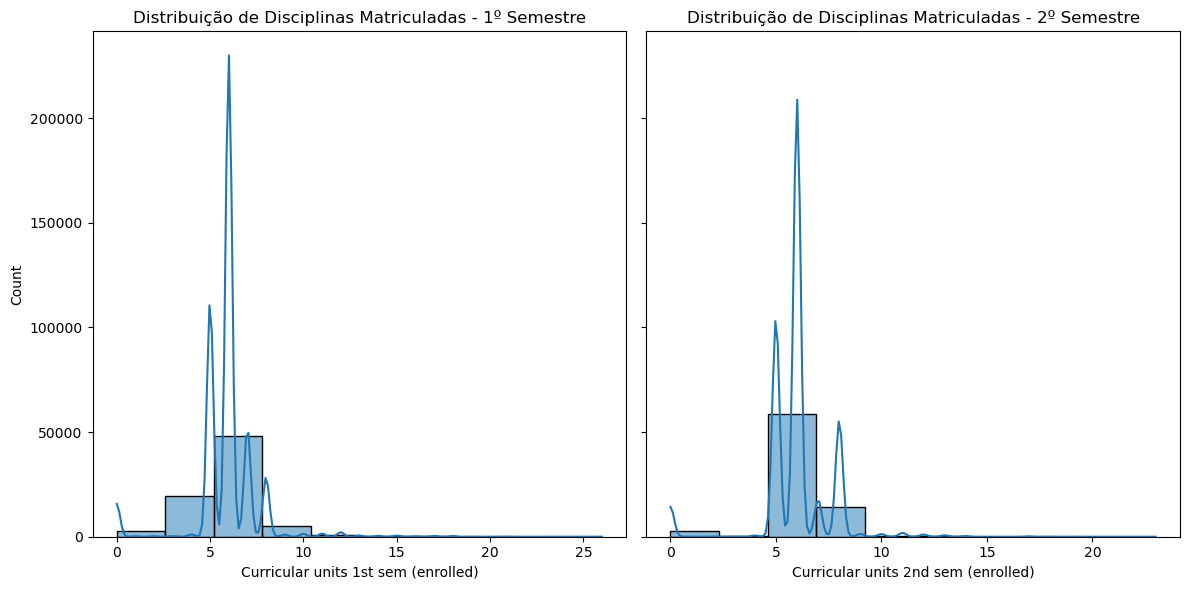

In [12]:
# Histograma para o número de disciplinas matriculadas no 1º e 2º semestre
plotar_histograma('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 
                  'Distribuição de Disciplinas Matriculadas - 1º Semestre', 'Distribuição de Disciplinas Matriculadas - 2º Semestre')

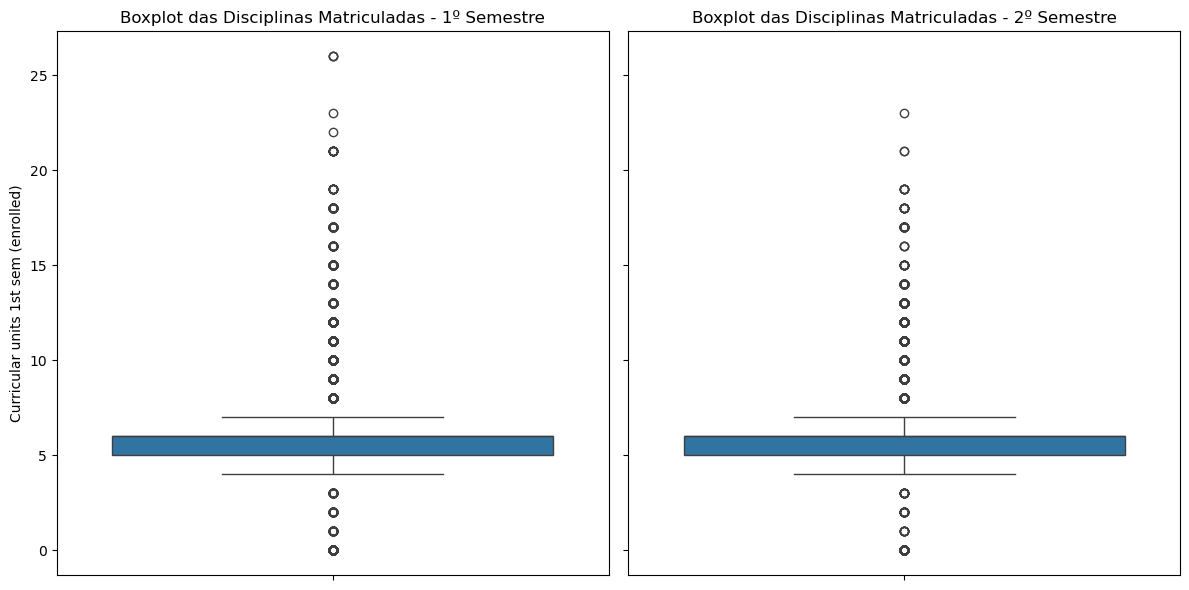

In [13]:
# Boxplot das disciplinas matriculadas
plotar_boxplot('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 
                  'Boxplot das Disciplinas Matriculadas - 1º Semestre', 'Boxplot das Disciplinas Matriculadas - 2º Semestre')

Como podemos observar nos gráficos acima, a grande maioria dos alunos se matriculam entre 2 a 8 disciplinas no 1º semestre e entre 5 a 9 disciplinas no 2º semestre. Também observamos que existem alguns alunos que se matriculam em muito menos disciplinas e outros em muito mais, sendo esses alunos **outliers** dentro do nosso dataset.

In [26]:
matriculado_1st = df_exp['Curricular units 1st sem (enrolled)'].mean()
matriculado_2nd = df_exp['Curricular units 2nd sem (enrolled)'].mean()

print(f'Um aluno médio da instituição se matricula em aproxidamente {matriculado_1st:.2f} disciplinas no 1º semestre')
print(f'E se matricula em aproxidamente {matriculado_2nd:.2f} disciplinas no 2º semestre.')
print(f'Totalizando uma média de disciplinas matriculadas no ano igual a {(matriculado_1st + matriculado_2nd) / 2:.2f} disciplinas.')

Um aluno médio da instituição se matricula em aproxidamente 5.89 disciplinas no 1º semestre
E se matricula em aproxidamente 5.93 disciplinas no 2º semestre.
Totalizando uma média de disciplinas matriculadas no ano igual a 5.91 disciplinas.


Se observarmos o comportamento dos dados no gráfico, é possível observar um pequeno deslocamento na média para o aumento de disciplinas matriculas no 2º semestre em comparação ao 1º semestre.

In [16]:
print(f'O aumento na média é igual a {enrolled_2nd - enrolled_1st:.4f}')
print(f'Representando um aumento percentual de {((enrolled_2nd - enrolled_1st) / enrolled_1st)*100:.2f}% na média do 1º semestre')

O aumento na média é igual a 0.0419
Representando um aumento percentual de 0.71% na média do 1º semestre


Mesmo com a mudança no gráfico, onde a frequência de alunos matriculados em 2 e 5 disciplinas despencou e a frequência entre 7 e 10 aumentou, a média se manteve estável entre os dois semestres. O que nos leva a conclusão que essa variável se manteve relativamente constante, ao menos em sua média, pelo ano da coleta dos dados.

### | Notas dos Semestres

Vamos observar a distribuição das variáveis referentes às notas de cada semestre.

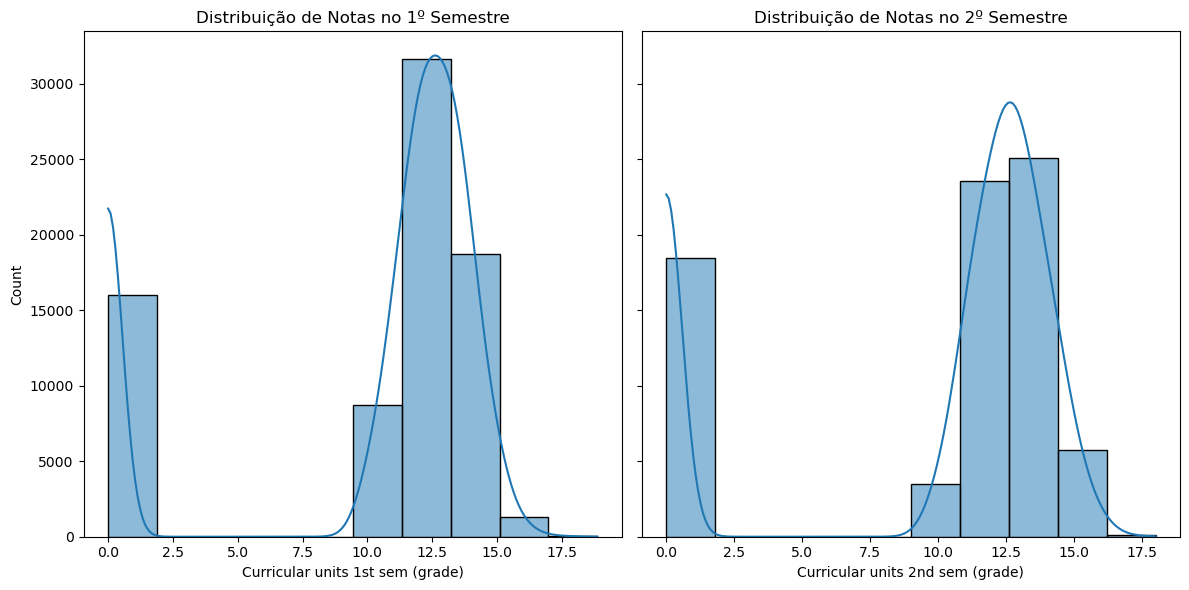

In [17]:
# Histograma para as notas do 1º e 2º semestre
plotar_histograma('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                 'Distribuição de Notas no 1º Semestre', 'Distribuição de Notas no 2º Semestre')

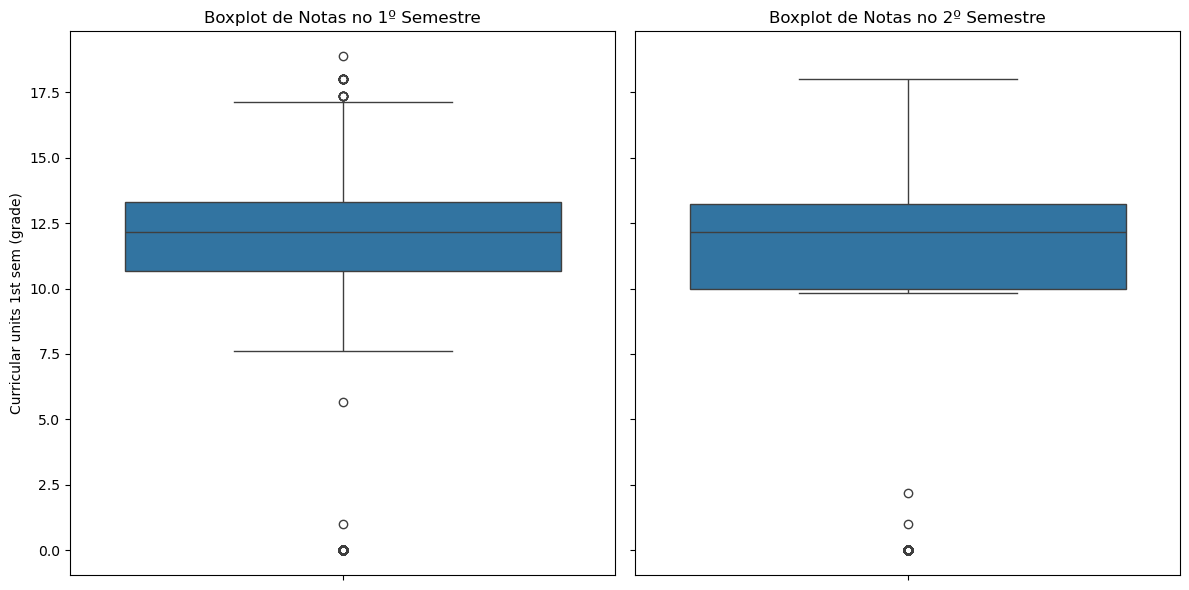

In [17]:
plotar_boxplot('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                 'Boxplot de Notas no 1º Semestre', 'Boxplot de Notas no 2º Semestre')

Conforme podemos observar no histograma, um número considerável de alunos ficaram com notas entre 0 e 2.5, os demais se encontram distribuídos entre o intervalo de 10 e 17.5, sendo esse intervalo o com o maior número de observações. Observando as variáveis das notas separadamente, eles possuem poucos outliers e uma distribuição menos abrangente de notas no 2º semestre comparado as notas do 1º semestre, com as notas do 2º semestre estando contida dentro de um intervalo de valores mais alto.

In [25]:
notas_1st = df_exp['Curricular units 1st sem (grade)'].mean()
notas_2nd = df_exp['Curricular units 2nd sem (grade)'].mean()

print(f'A média de notas dos alunos no 1º semestre é de {notas_1st:.2f}.')
print(f'A média de notas dos alunos no 2º semestre é de {notas_2nd:.2f}.')
print(f'Totalizando uma média anual igual a {(notas_1st + notas_2nd) / 2:.2f}.')

A média de notas dos alunos no 1º semestre é de 10.00.
A média de notas dos alunos no 2º semestre é de 9.63.
Totalizando uma média anual igual a 9.81.


In [29]:
print(f'A diminuição na média é igual a {grades_2nd - grades_1st:.4f}')
print(f'Representando uma baixa percentual de {((grades_2nd - grades_1st) / grades_1st)*100:.2f}% na média no 2º semestre')

A diminuição na média é igual a -0.3698
Representando uma baixa percentual de -3.70% na média no 2º semestre


Com base nas informações acima, sabemos que os alunos apresentaram um queda no desempenho acadêmico no 2º semestre. Ao mesmo tempo, as notas do 2º semestre se encontram em intervalos mais altos de valores comparadas as notas do 1º semestre.

### | Disciplinas Aprovadas

Vamos abordar a distribuição de disciplinas aprovadas no 1º e 2º semestre, avaliando também a **taxa de aprovação** média dos alunos.

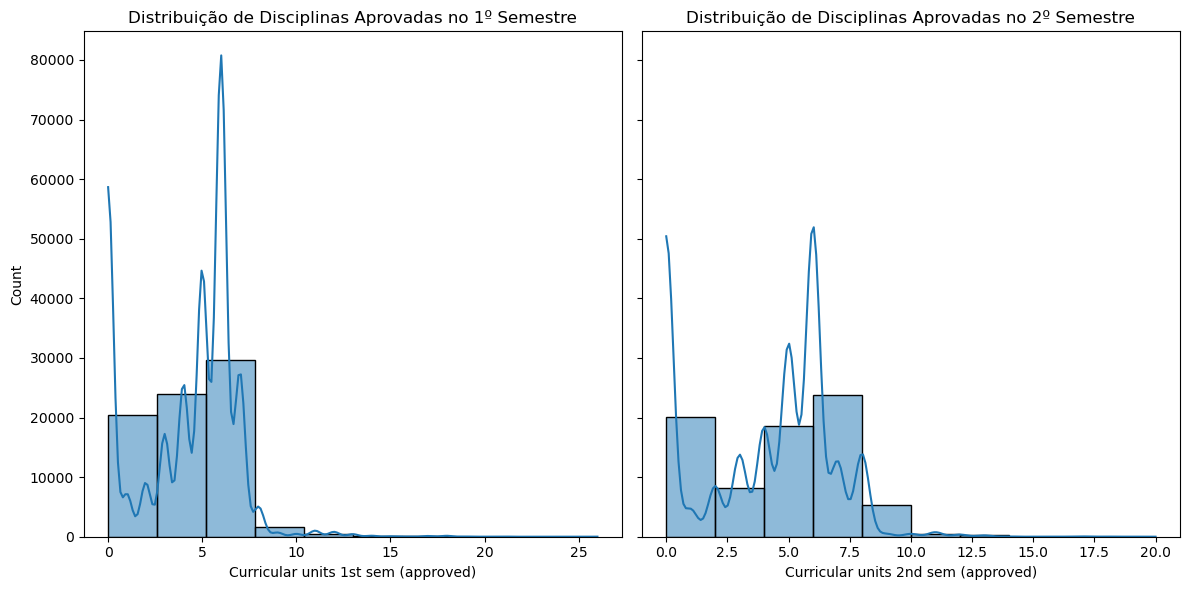

In [30]:
plotar_histograma('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                 'Distribuição de Disciplinas Aprovadas no 1º Semestre', 'Distribuição de Disciplinas Aprovadas no 2º Semestre')

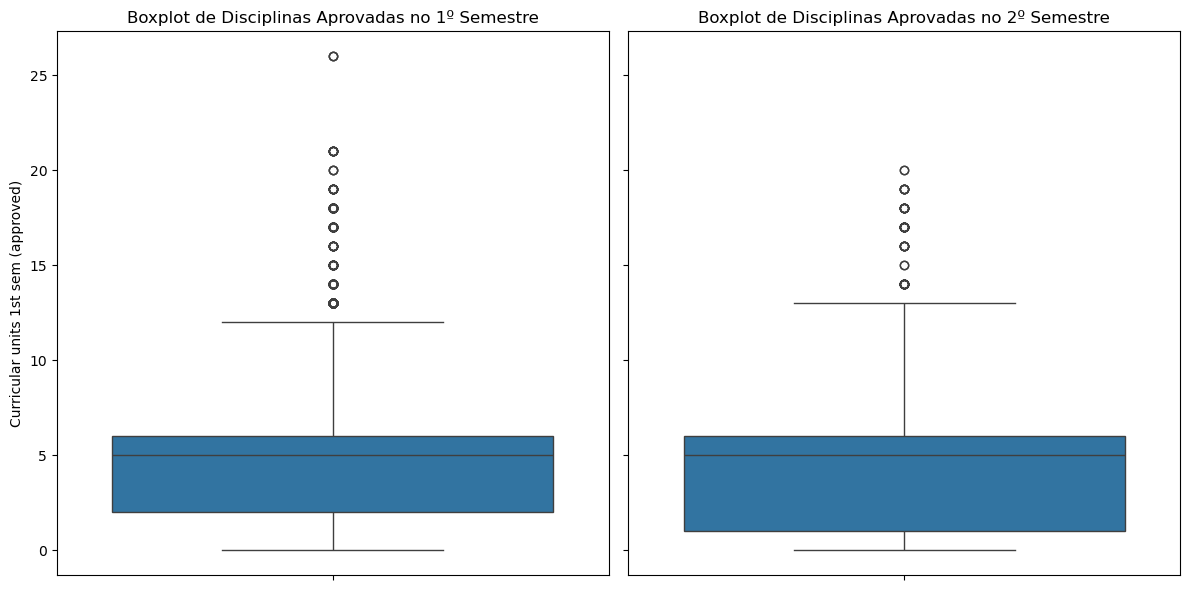

In [31]:
plotar_boxplot('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                 'Boxplot de Disciplinas Aprovadas no 1º Semestre', 'Boxplot de Disciplinas Aprovadas no 2º Semestre')

In [21]:
tab_freq_approved_1st = (df_exp['Curricular units 1st sem (approved)'].value_counts() / df_exp.shape[0]) * 100
tab_freq_approved_2nd = (df_exp['Curricular units 2nd sem (approved)'].value_counts() / df_exp.shape[0]) * 100

print('Composição de Classes de Frequência no 1º Semestre:')
print('='*50)
print(tab_freq_approved_1st)
print('='*50)
print('Composição de Classes de Frequência no 2º Semestre:')
print(tab_freq_approved_2nd)
print('='*50)
print('Diferença na Composição das Classes de Frequência')
print(tab_freq_approved_2nd - tab_freq_approved_1st)
print('='*50)

Composição de Classes de Frequência no 1º Semestre:
Curricular units 1st sem (approved)
6     28.823283
0     20.953240
5     16.007998
7      9.882642
4      9.167778
3      6.139732
2      3.234533
1      2.543192
8      1.790428
11     0.362006
12     0.291435
9      0.250921
10     0.169895
13     0.152905
14     0.058810
18     0.054889
17     0.044434
15     0.026138
19     0.013069
16     0.013069
21     0.011762
20     0.003921
26     0.003921
Name: count, dtype: float64
Composição de Classes de Frequência no 2º Semestre:
Curricular units 2nd sem (approved)
6     24.956219
0     24.148566
5     15.460415
4      8.761337
8      6.669019
3      6.565775
7      6.026033
2      4.055255
1      2.175959
11     0.363313
9      0.232625
10     0.228704
12     0.171202
13     0.105857
17     0.023524
14     0.022217
18     0.011762
16     0.009148
19     0.007841
15     0.002614
20     0.002614
Name: count, dtype: float64
Diferença na Composição das Classes de Frequência
0     3.195327

O principal elemento que chama a atenção no histograma acima é a queda considerável na quantidade de disciplinas aprovadas no 2º semestre, mesmo que existem alunos que passaram em mais disciplinas no 2º semestre, no geral parece que menos alunos foram aprovados em outras disciplinas. De fato, corroborando com a suspeita sobre o gráfico, as tabelas acimas mostram que a frequência da classe 0 (não aprovado em nenhum disciplina) aumentou em aproxidamente **3.20%** do 1º para o 2º semestre. A tabela também indica uma redução generalizada na frequência de múltiplas classes, o que faz sentido dado o histograma observado. 

O boxplot dessas variáveis mostram que existem poucos outliers e uma distribuição de valores similar entre o 1º e 2º semestre, mas reforçando o que foi visto acima com uma inclinação para menos disciplinas aprovadas no 2º semestre.

Abaixo, vamos observar a **porcentagem média de aprovação**, calculada ao dividir a quantidade de disiciplinas aprovadas pela quantidade total de disciplinas matriculadas no semestre.

In [32]:
aprov_1st = ((df_exp['Curricular units 1st sem (approved)'] / df_exp['Curricular units 1st sem (enrolled)'])
             .replace([np.inf, -np.inf], np.nan)
             .bfill()
             .mean()) * 100

aprov_2nd = ((df_exp['Curricular units 2nd sem (approved)'] / df_exp['Curricular units 2nd sem (enrolled)'])
             .replace([np.inf, -np.inf], np.nan)
             .bfill()
             .mean()) * 100

print(f'A taxa média de aprovação em disciplinas no 1º semestre dos alunos é de {aprov_1st:.2f}%')
print(f'A taxa média de aprovação em disciplinas no 2º semestre dos alunos é de {aprov_2nd:.2f}%')
print(f'A taxa média de aprovação em disciplinas no ano letivo dos alunos é de {(aprov_1st+aprov_2nd)/2:.2f}%')

A taxa média de aprovação em disciplinas no 1º semestre dos alunos é de 69.30%
A taxa média de aprovação em disciplinas no 2º semestre dos alunos é de 65.74%
A taxa média de aprovação em disciplinas no ano letivo dos alunos é de 67.52%


Exatamente observado até esse ponto, a aprovação dos alunos reduziu no 2º semestre, uma queda percentual de aproximadamente **3.56%**.

### | Idade na Matrícula

Em seguida, vamos observar as demais variáveis buscando um outro padrão oculto nos dados. Começando com a distribuição da variável **idade** no ato da matrícula da instituição.

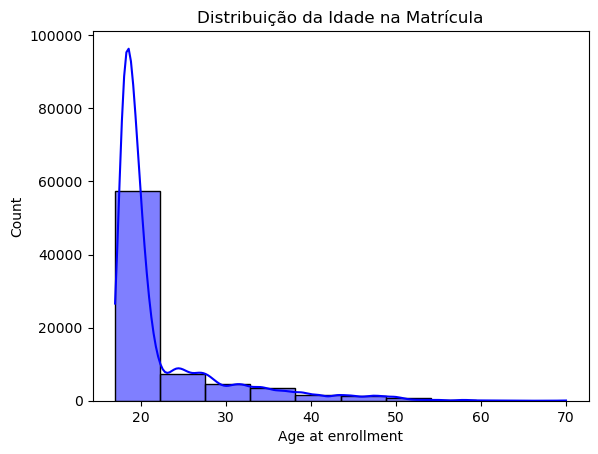

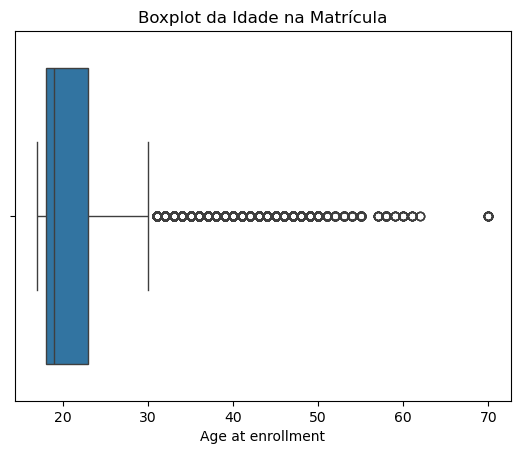

In [33]:
plotar_hist_e_box('Age at enrollment', 'blue', 'Distribuição da Idade na Matrícula', 'Boxplot da Idade na Matrícula')

Como podemos observar, a maioria dos alunos na instituição são jovens entre 20 e 25 anos. A variável também contém **outliers** que devemos manter em mente.

In [34]:
# Mostrando as três idades mais frequentes
((df_exp['Age at enrollment'].value_counts()/df_exp.shape[0])*100).sort_values()[-3:]

Age at enrollment
20    13.548446
19    23.625814
18    29.244099
Name: count, dtype: float64

Conforme observado acima, as idades mais frequentes são 20, 19 e 18 anos; compondon em conjunto aproximadamente **66.3%** dos nosso dados.

### | Notas de Admissão

Em seguida, vamos observar a distribuição da **nota de admissão** da instituição.

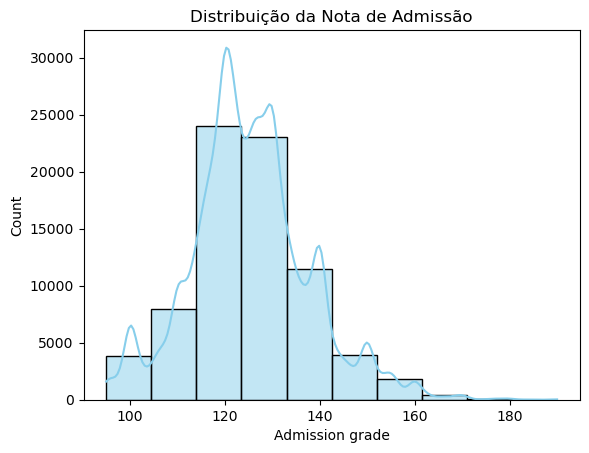

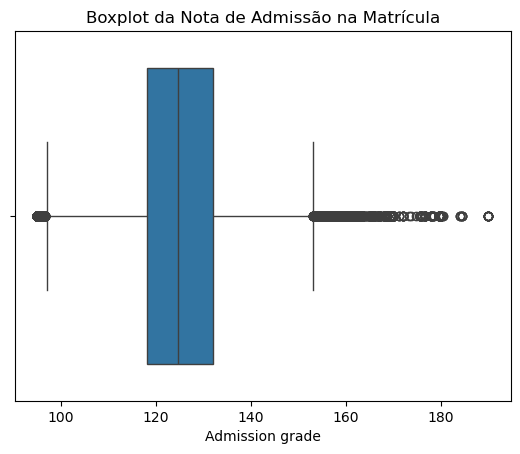

In [35]:
plotar_hist_e_box('Admission grade', 'skyblue', 'Distribuição da Nota de Admissão', 'Boxplot da Nota de Admissão na Matrícula')

A primeira coisa que chama a atenção, existem muitos outliers dentro dessa variável, o que a torna perigosa de usar no nosso modelo. Agora observando a distribuição das notas, vemos que a maioria se concentra dentro do intervalo de 110 e 130.

Por comparação, vamos observar as notas da qualificação anterior dos alunos.

### | Notas da Qualificação Anterior

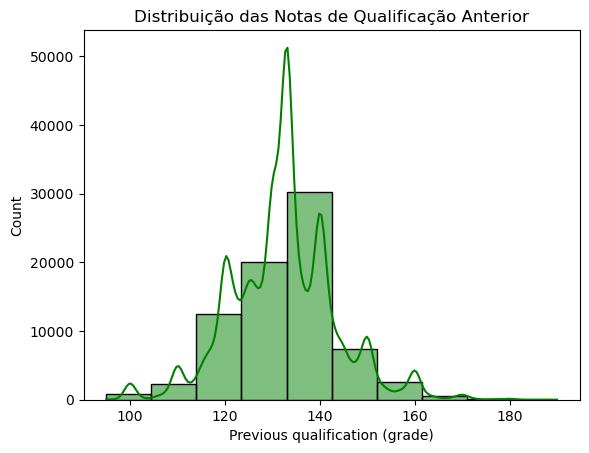

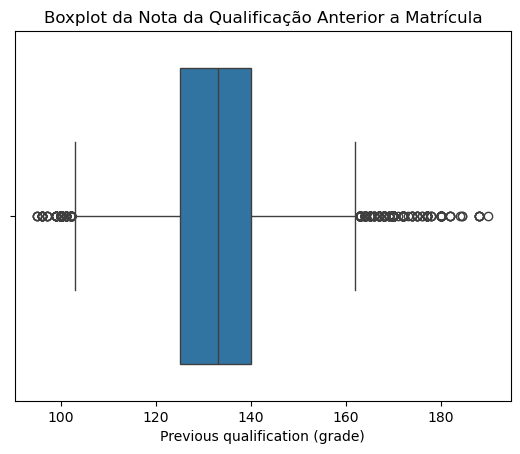

In [36]:
plotar_hist_e_box('Previous qualification (grade)', 'green', 
                  'Distribuição das Notas de Qualificação Anterior', 'Boxplot da Nota da Qualificação Anterior a Matrícula')

Conforme visto, essa variável também possue um grande número de outliers e uma distribuição levemente semelhante a anterior, com as notas se distribuindo de forma pouco menos condensada no intervalo de 120 a 140.

### | Taxa de Desemprego

Abaixo vamos observar as variáveis econômicas do nosso dataset, começando pela taxa de desemprego.

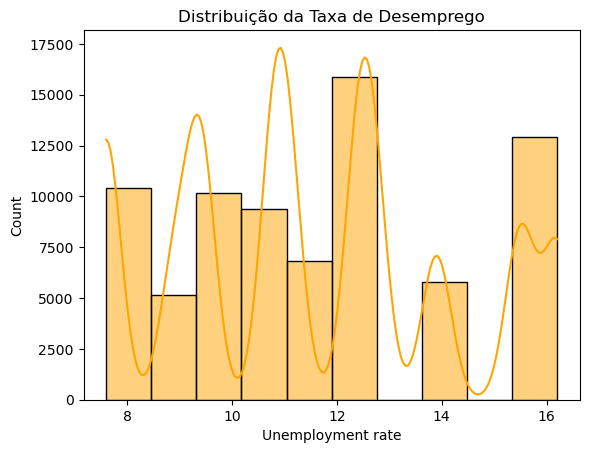

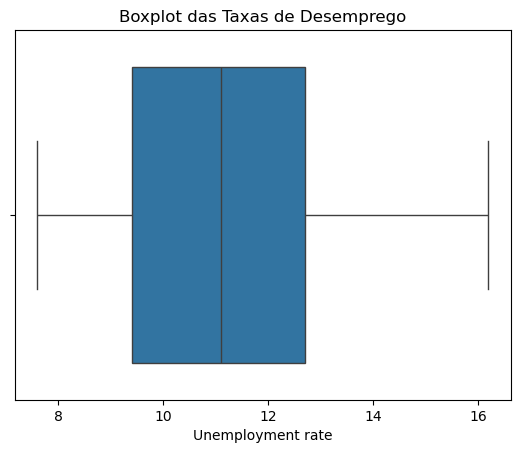

In [37]:
plotar_hist_e_box('Unemployment rate', 'orange', 
                  'Distribuição da Taxa de Desemprego', 'Boxplot das Taxas de Desemprego')

Essa variável não possui outliers e seu comportamento é bem variado, talvez seja útil como variável explicativa no modelo, mas antes de chegarmos a alguma conclusão, vamos seguir nossa análise.

### | Taxa de Inflação

Abaixo, vamos visualizar o comportamento da variável das taxas de inflação.

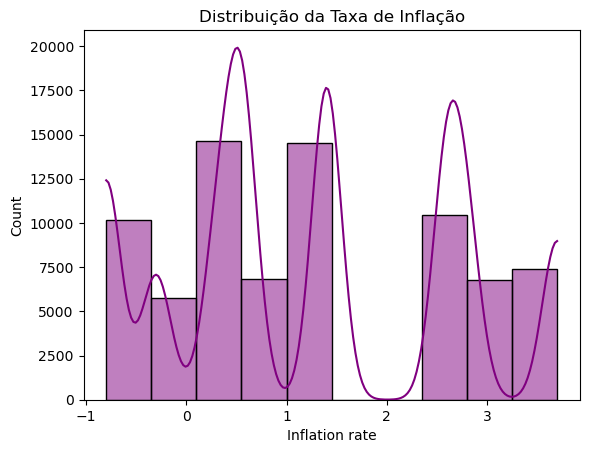

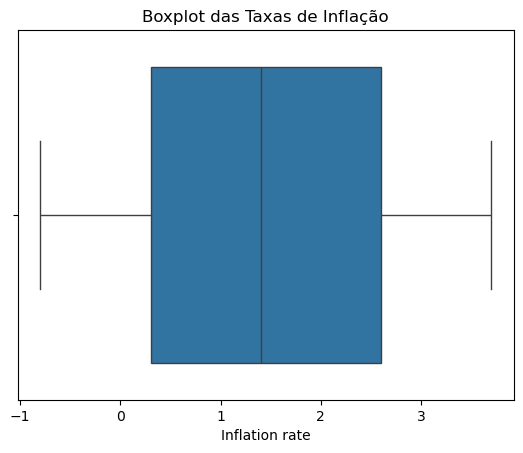

In [38]:
plotar_hist_e_box('Inflation rate', 'purple', 
                  'Distribuição da Taxa de Inflação', 'Boxplot das Taxas de Inflação')

Essa variável também pode ser útil, nenhum outlier e bem variada.

### | GDP

Por fim, vamos observar a variável do GDP (PIB).

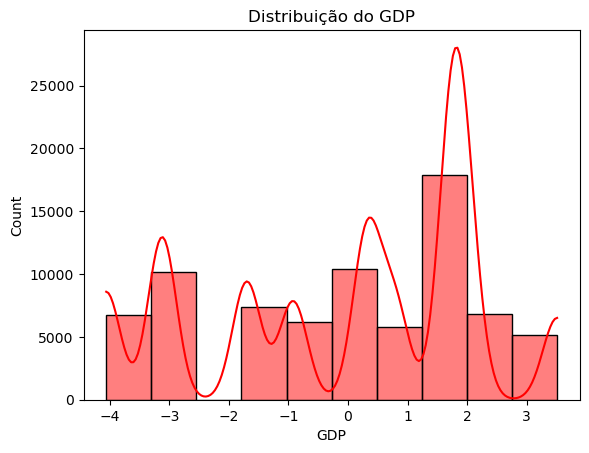

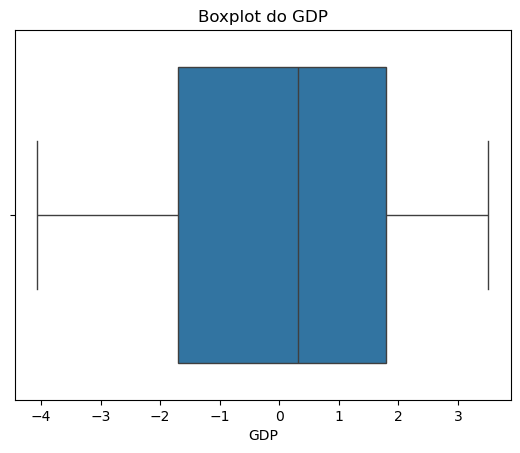

In [39]:
plotar_hist_e_box('GDP', 'red', 'Distribuição do GDP', 'Boxplot do GDP')

Assim como as demais variáveis da mesma categoria, não possui outliers e é bem variada. Caso essas três variáveis apresentam uma **correlação** relevante com nossa variável dependente, elas podem ser incluídas na modelagem.

O mesmo caso se aplica as variáveis de disciplinas matriculadas, aprovadas e notas. As únicas variáveis não propensas a serem selecionadas são as notas de admissão e qualificação, dado o alto número de outliers que essas possuem e a varíavel idade, dado a alta concentração em alunos jovens, o que torna a informação obtida dessa variável menos desejável.

Agora vamos aprofundar nossa análise e extendê-la para as variáveirs categóricas do dataset.

<a name="ucategoricas"></a>
## | Analisando Variáveis Categóricas

Variáveis **categóricas**, são todas as variáveis que descrevem uma propriedade não mensurável do elemento observado, nesse caso, dos alunos da instituição. Vamos verificar a distribuição de **classes** dessas variáveis, isto é, todos os possíveis valores que cada variável categórica pode assumir.

[Retornar ao Índice](#índice)

In [40]:
df_exp.drop(cols_continuas, axis=1).head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,0,1,1,1,9238,1,1,1,1,19,5,5,0,0,0,1,0,1,0,Graduate
1,1,1,17,1,9238,1,1,1,19,19,9,9,1,0,0,1,0,0,0,Dropout
2,2,1,17,2,9254,1,1,1,3,19,2,3,0,0,0,1,1,0,0,Dropout
3,3,1,1,3,9500,1,1,1,19,3,3,2,1,0,0,1,0,1,0,Enrolled
4,4,1,1,2,9500,1,1,1,19,37,4,9,1,0,0,1,0,0,0,Graduate


Dado o nosso relatório, sabemos que o maior problema das variáveis categóricas é o **desbalanceamento** de classes, que afeta:

- **Daytime/evening attendance**
- **Educational special needs**
- **Debtor**
- **Tuition fees up to date**
- **International**
- **Nacionality**

Vamos observar o caso para as demais variáveis, exceto **id** que é a nossa variável identificadora, e então vamos observar a distribuição das classes por variável categórica.

In [41]:
# Função para calcular e mostrar a tabela de frequência das variáveis categóricas
def freq_classes(col):
    # Caria a tabela de frequência em termos percentuais
    tab_freq = (df_exp[col].value_counts() / df_exp.shape[0]) * 100

    # Visualiza a tabela de frequência
    print('='*138)
    print(f'Distribuição Percentual das Classes para {col}')
    print(tab_freq)
    print('='*138)
    
    # Plota o gráfico de barras
    plt.figure(figsize=(10, 6))
    tab_freq.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Personaliza o gráfico
    plt.title(f'Frequência Percentual de {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequência Percentual (%)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibe o gráfico
    plt.tight_layout()
    plt.show()

Distribuição Percentual das Classes para Marital status
Marital status
1    91.728744
2     6.921247
4     1.131760
5     0.151598
6     0.045741
3     0.020910
Name: count, dtype: float64


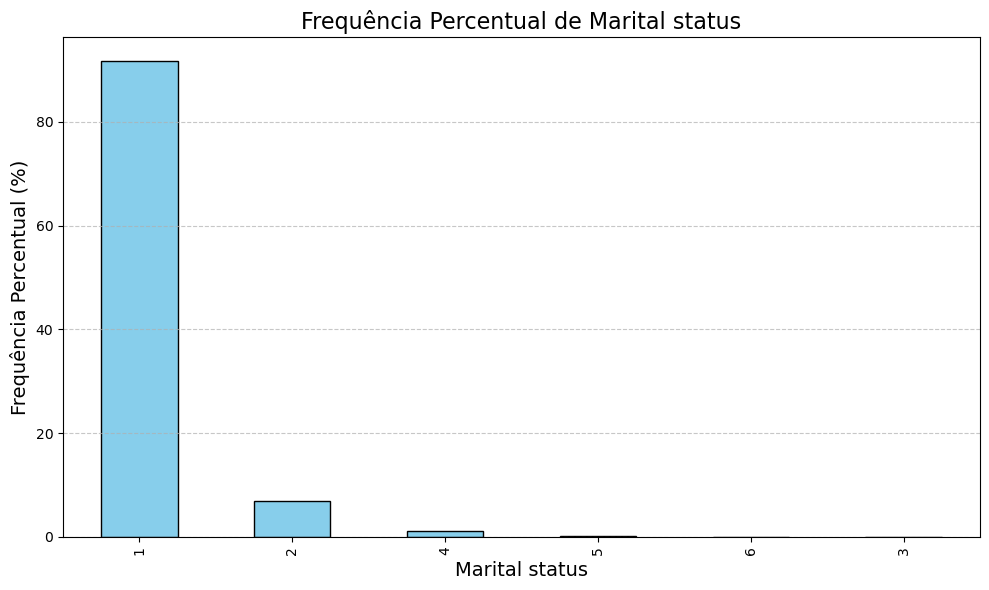

Distribuição Percentual das Classes para Application mode
Application mode
1     46.037534
17    21.593612
39    18.974620
44     3.936329
43     3.490682
7      1.957709
18     1.641444
42     0.720092
51     0.577642
16     0.346324
53     0.294048
15     0.239159
5      0.113699
10     0.056196
2      0.010455
27     0.002614
12     0.001307
26     0.001307
4      0.001307
35     0.001307
9      0.001307
3      0.001307
Name: count, dtype: float64


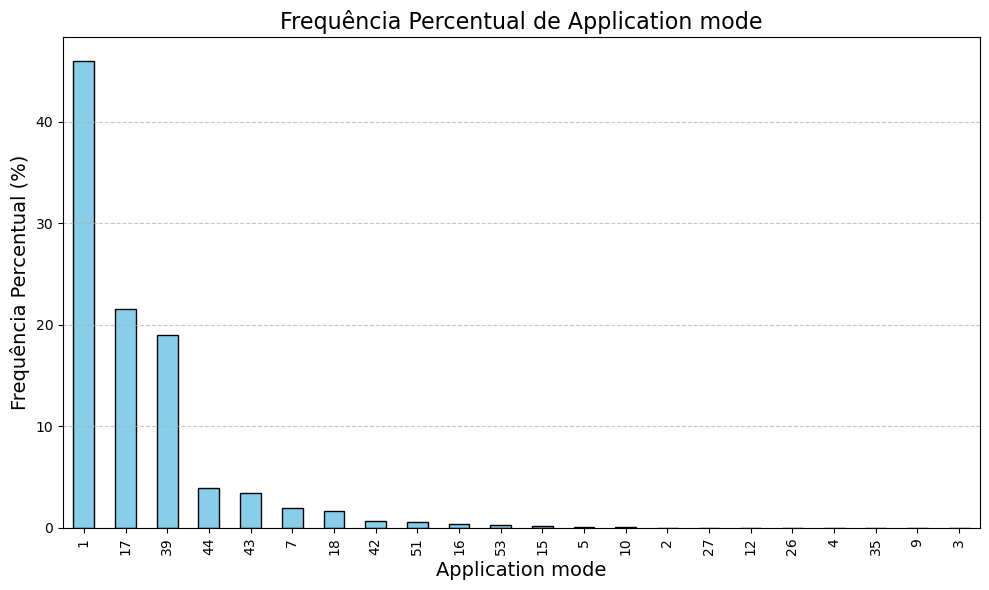

Distribuição Percentual das Classes para Application order
Application order
1    71.069552
2    11.598578
3     7.010115
4     4.994903
5     2.777124
6     2.544499
0     0.003921
9     0.001307
Name: count, dtype: float64


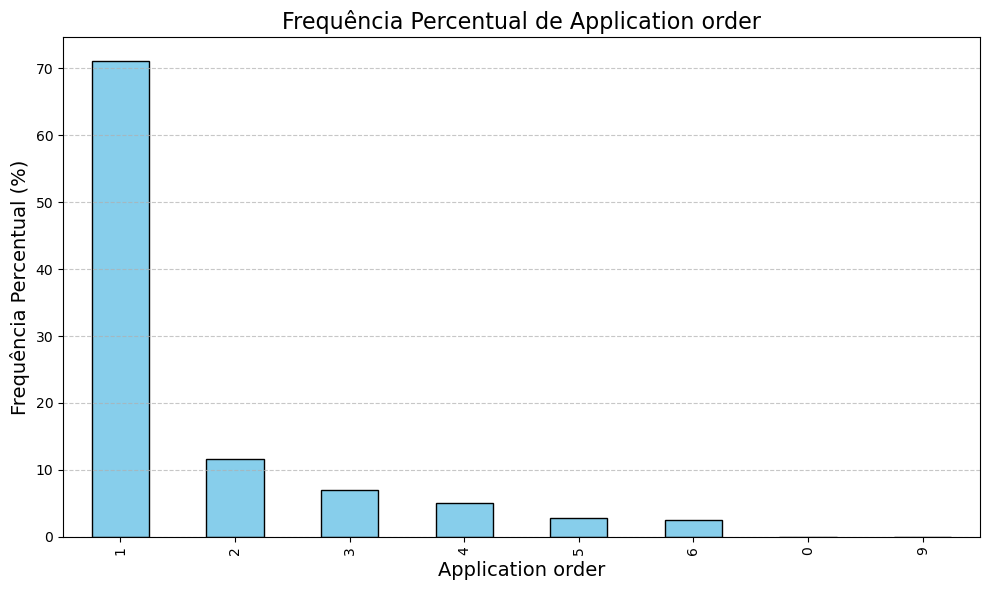

Distribuição Percentual das Classes para Course
Course
9500    15.779294
9773    10.734729
9238    10.370109
9147    10.116574
9254     7.089835
9085     7.021877
9670     6.220759
9991     5.302020
9003     4.878591
9070     4.287880
9853     4.179409
9119     3.925874
171      3.736376
8014     3.186178
9130     2.098853
9556     0.974934
33       0.094096
979      0.001307
39       0.001307
Name: count, dtype: float64


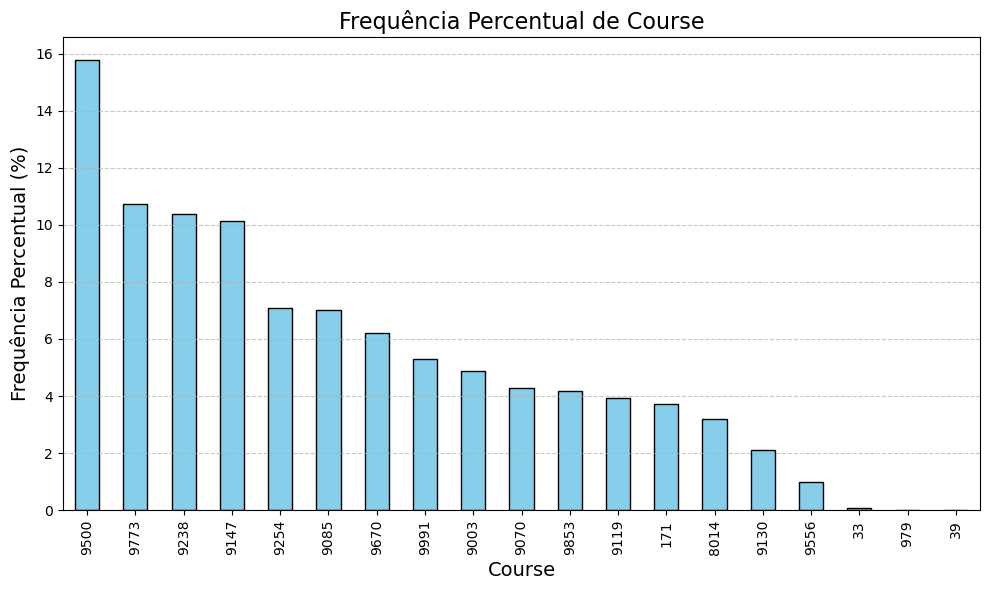

Distribuição Percentual das Classes para Daytime/evening attendance
Daytime/evening attendance
1    91.531404
0     8.468596
Name: count, dtype: float64


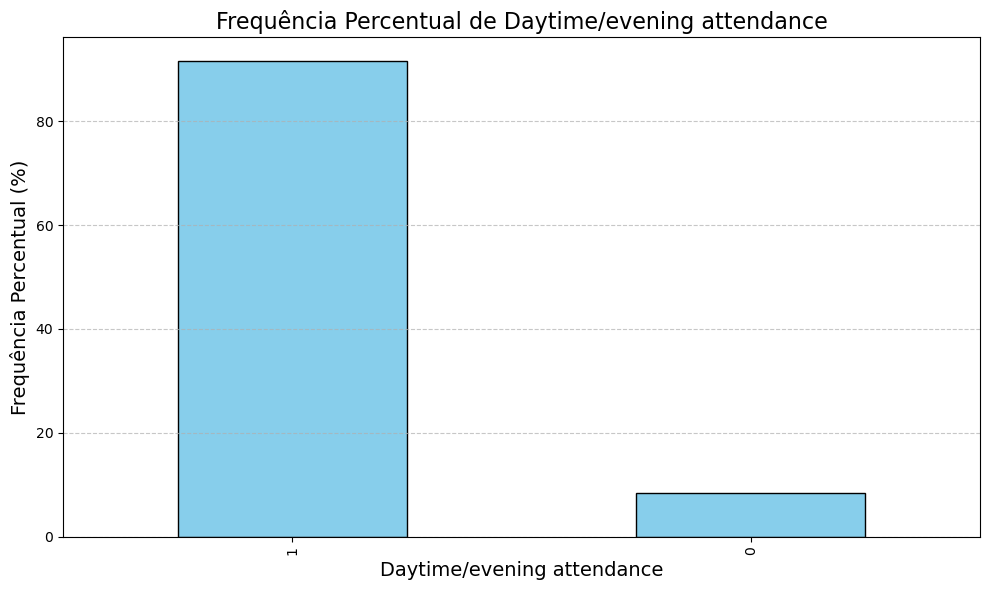

Distribuição Percentual das Classes para Previous qualification
Previous qualification
1     87.800256
19     3.851381
39     3.826551
3      1.830942
12     1.174887
9      0.402520
40     0.338482
42     0.299276
2      0.128074
6      0.128074
10     0.056196
43     0.050968
38     0.049662
4      0.030058
15     0.014376
5      0.003921
14     0.003921
37     0.003921
11     0.002614
17     0.002614
36     0.001307
Name: count, dtype: float64


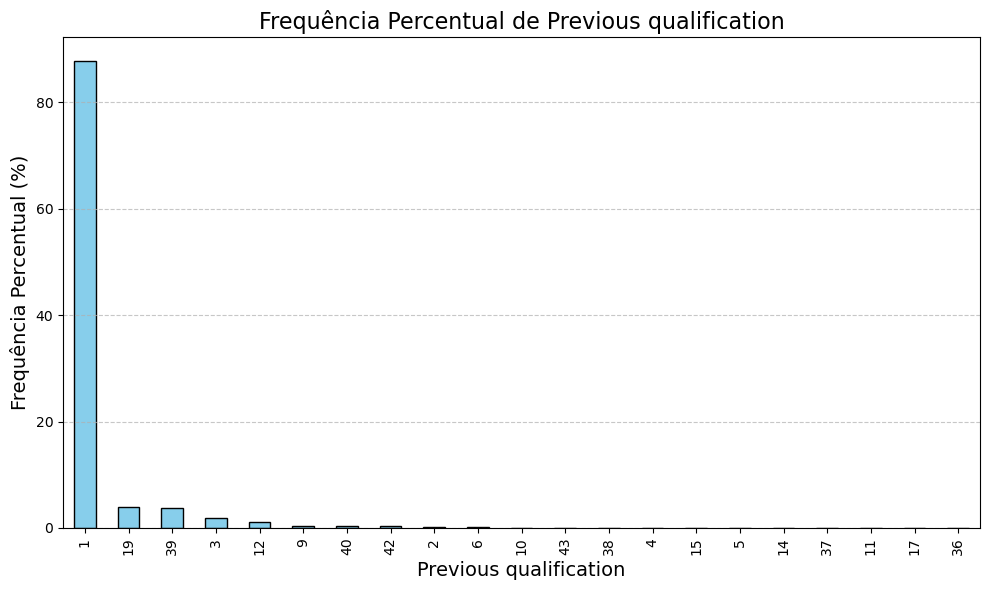

Distribuição Percentual das Classes para Nacionality
Nacionality
1      99.340025
41      0.288821
26      0.087561
6       0.073185
22      0.073185
24      0.019603
11      0.019603
2       0.016989
103     0.015683
105     0.011762
101     0.011762
100     0.011762
21      0.007841
25      0.007841
62      0.007841
17      0.002614
109     0.002614
32      0.001307
Name: count, dtype: float64


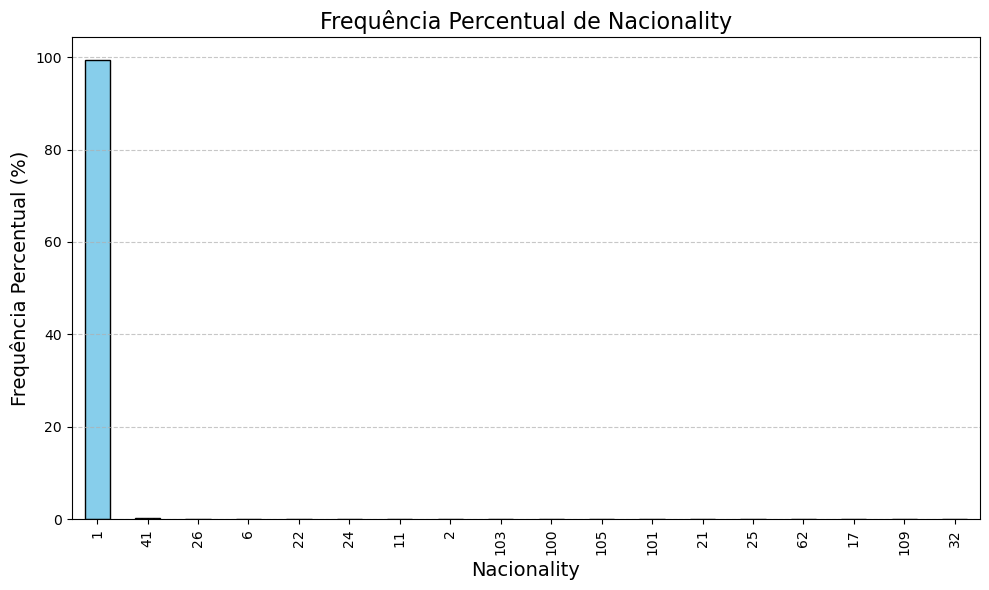

Distribuição Percentual das Classes para Mother's qualification
Mother's qualification
1     26.401631
19    24.804621
37    24.391646
38    11.839044
3      7.697535
34     2.604616
2      0.801119
12     0.467864
4      0.409054
5      0.129381
40     0.064037
39     0.060117
9      0.058810
11     0.041820
41     0.033979
6      0.027445
42     0.024831
43     0.020910
10     0.019603
36     0.019603
29     0.019603
35     0.013069
30     0.013069
22     0.006534
14     0.006534
26     0.005228
18     0.003921
44     0.002614
33     0.002614
31     0.002614
15     0.001307
7      0.001307
8      0.001307
28     0.001307
27     0.001307
Name: count, dtype: float64


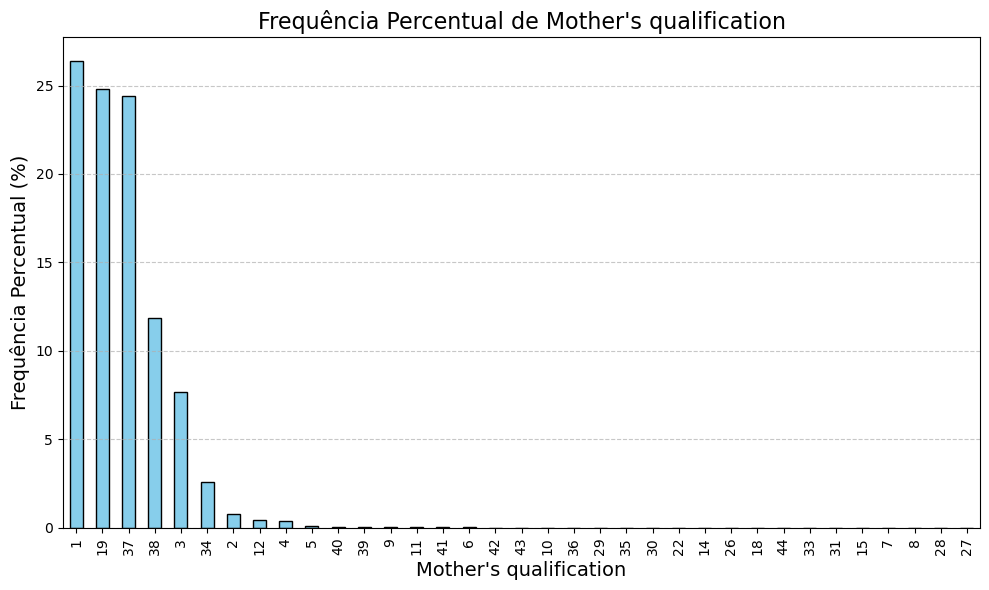

Distribuição Percentual das Classes para Father's qualification
Father's qualification
37    30.437283
19    24.850362
1     20.392587
38    16.013226
3      3.935022
34     2.339319
2      0.648213
12     0.384223
4      0.292742
39     0.156826
5      0.130688
11     0.098016
36     0.056196
29     0.032672
40     0.032672
9      0.024831
14     0.023524
43     0.018296
30     0.018296
41     0.016989
22     0.014376
10     0.013069
6      0.011762
26     0.011762
42     0.009148
35     0.006534
18     0.005228
13     0.003921
44     0.003921
20     0.003921
27     0.002614
7      0.002614
33     0.001307
31     0.001307
21     0.001307
23     0.001307
15     0.001307
24     0.001307
25     0.001307
Name: count, dtype: float64


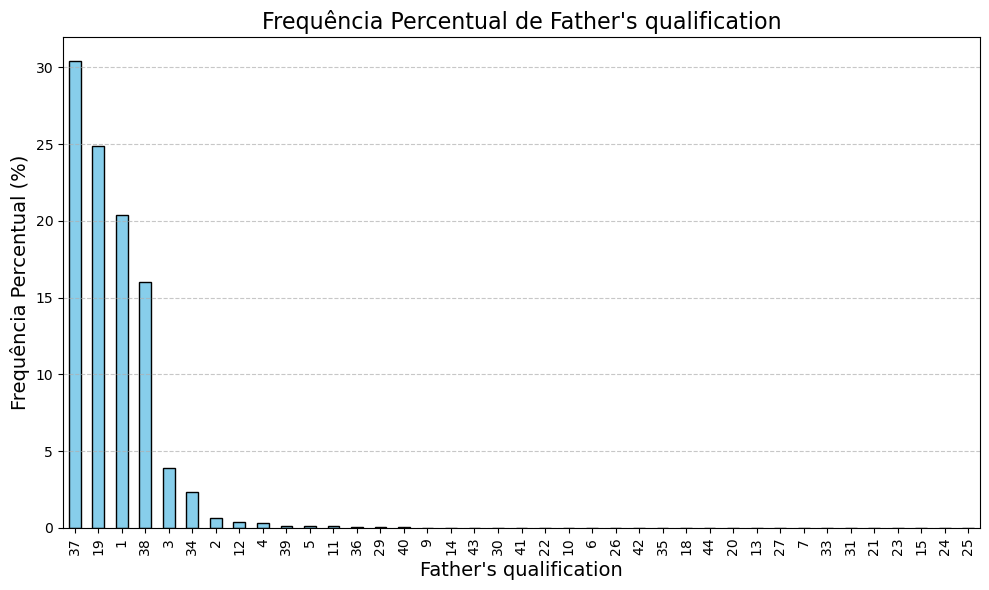

Distribuição Percentual das Classes para Mother's occupation
Mother's occupation
9      42.324682
4      20.991139
5      12.352649
3       6.069160
7       5.498053
2       5.341227
0       2.882982
90      1.278131
6       1.027209
1       1.001072
8       0.317572
191     0.277059
99      0.180350
194     0.103244
141     0.066651
123     0.057503
144     0.032672
192     0.030058
10      0.023524
152     0.016989
193     0.016989
134     0.014376
132     0.014376
175     0.014376
151     0.014376
143     0.011762
153     0.010455
131     0.007841
122     0.007841
173     0.002614
171     0.001307
172     0.001307
11      0.001307
127     0.001307
38      0.001307
163     0.001307
125     0.001307
124     0.001307
103     0.001307
101     0.001307
Name: count, dtype: float64


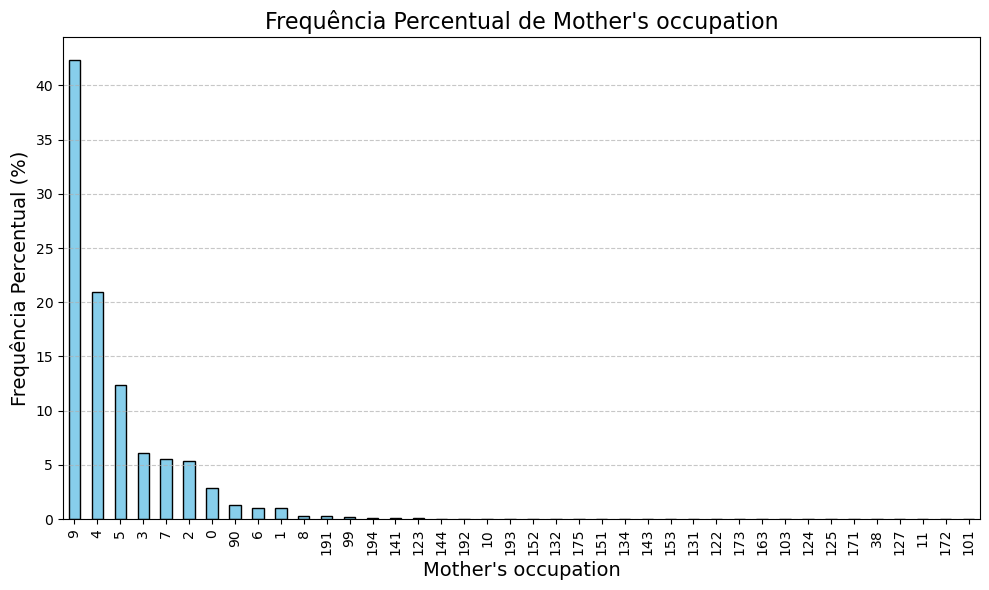

Distribuição Percentual das Classes para Father's occupation
Father's occupation
9      29.169607
7      16.871847
5      12.625787
4       8.714289
3       7.400873
8       6.679474
10      5.367365
6       3.818709
2       2.922188
0       2.686949
1       1.538200
90      1.288586
99      0.196032
193     0.108471
171     0.086254
144     0.081027
163     0.061423
175     0.048355
103     0.037900
192     0.035286
181     0.024831
152     0.023524
135     0.018296
182     0.014376
151     0.013069
172     0.013069
112     0.013069
102     0.013069
154     0.011762
183     0.010455
123     0.010455
194     0.010455
153     0.009148
122     0.009148
143     0.006534
195     0.006534
131     0.006534
114     0.005228
101     0.005228
141     0.005228
132     0.003921
174     0.003921
134     0.003921
121     0.003921
11      0.001307
19      0.001307
148     0.001307
22      0.001307
124     0.001307
96      0.001307
191     0.001307
125     0.001307
12      0.001307
39      0.001307
1

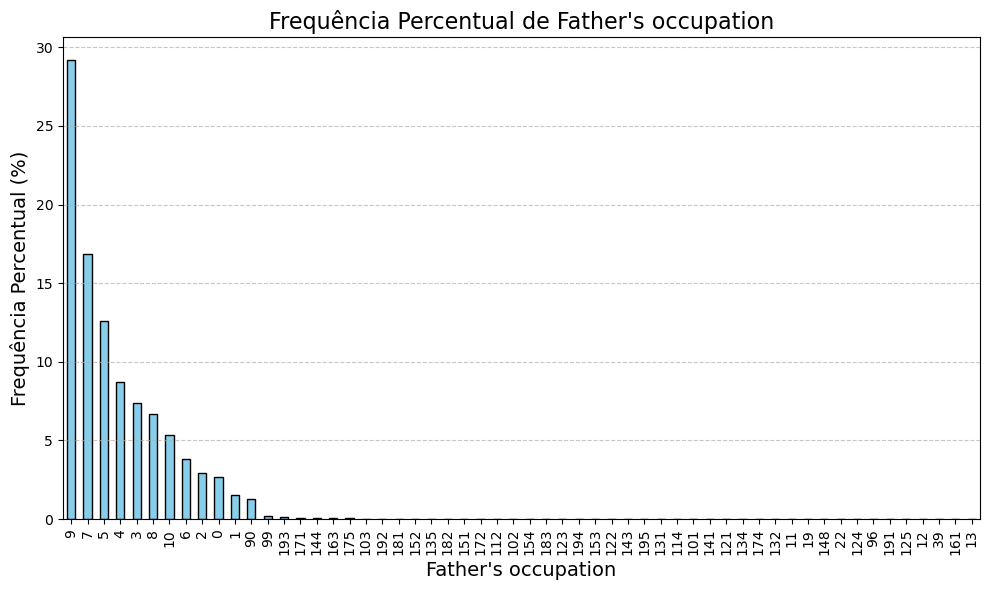

Distribuição Percentual das Classes para Displaced
Displaced
1    56.926475
0    43.073525
Name: count, dtype: float64


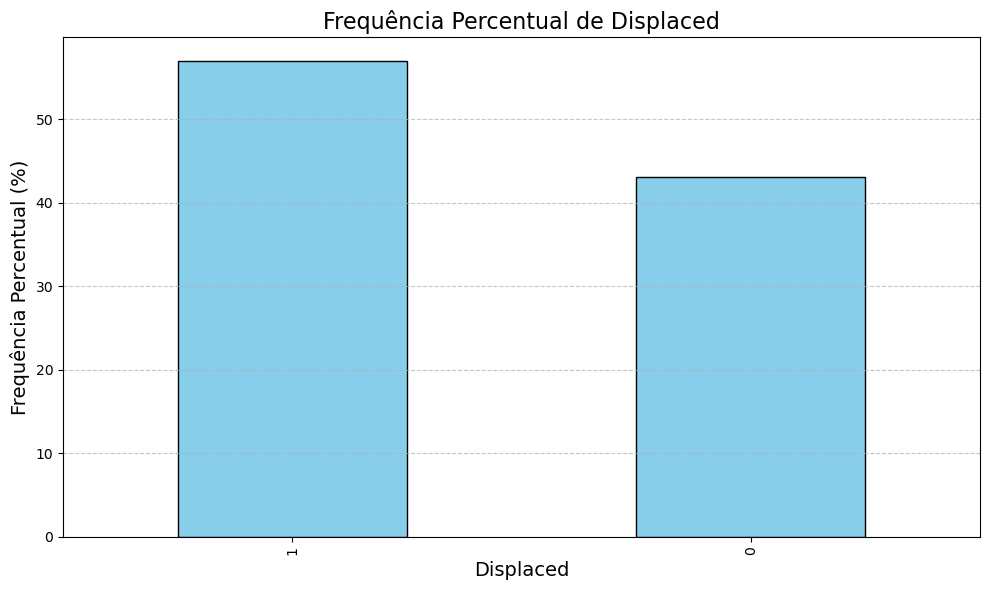

Distribuição Percentual das Classes para Educational special needs
Educational special needs
0    99.626232
1     0.373768
Name: count, dtype: float64


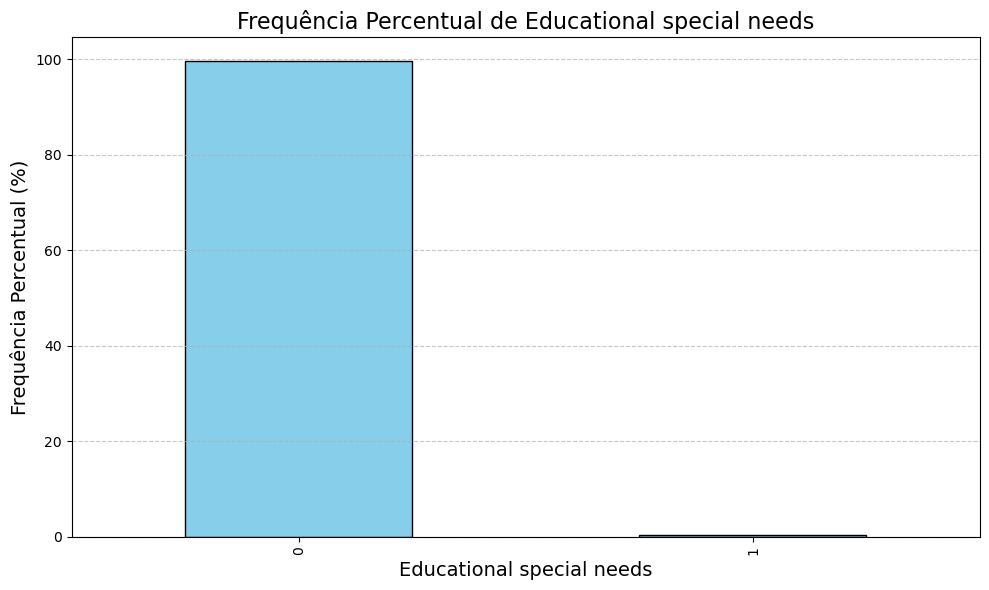

Distribuição Percentual das Classes para Debtor
Debtor
0    92.86181
1     7.13819
Name: count, dtype: float64


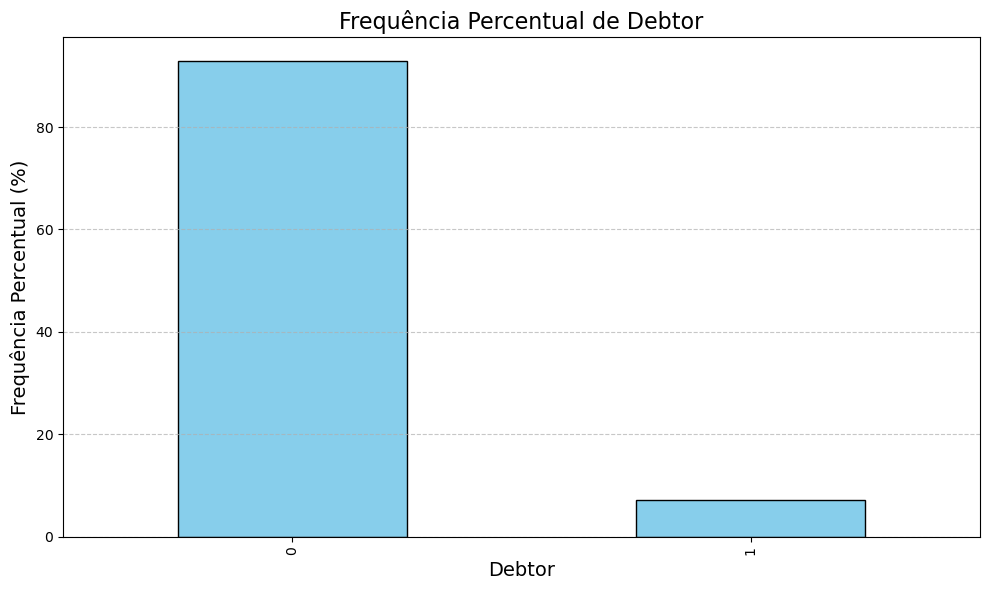

Distribuição Percentual das Classes para Tuition fees up to date
Tuition fees up to date
1    89.364594
0    10.635406
Name: count, dtype: float64


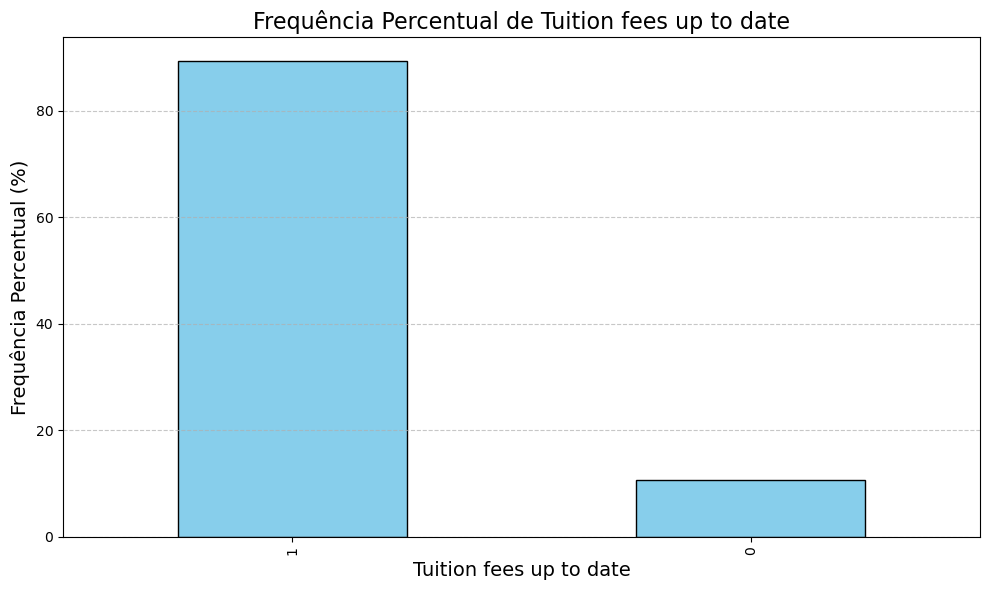

Distribuição Percentual das Classes para Gender
Gender
0    68.417889
1    31.582111
Name: count, dtype: float64


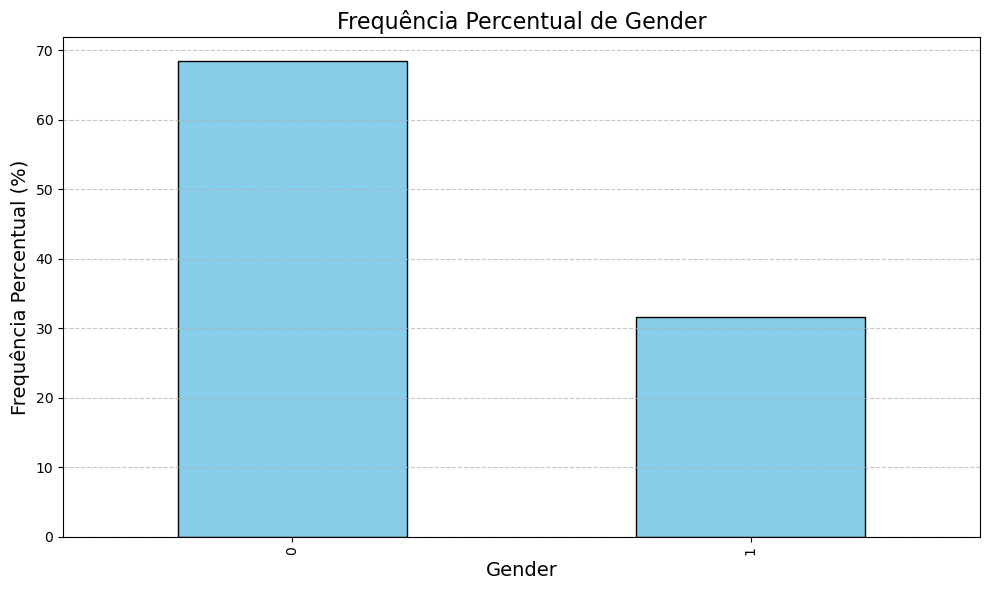

Distribuição Percentual das Classes para Scholarship holder
Scholarship holder
0    75.260723
1    24.739277
Name: count, dtype: float64


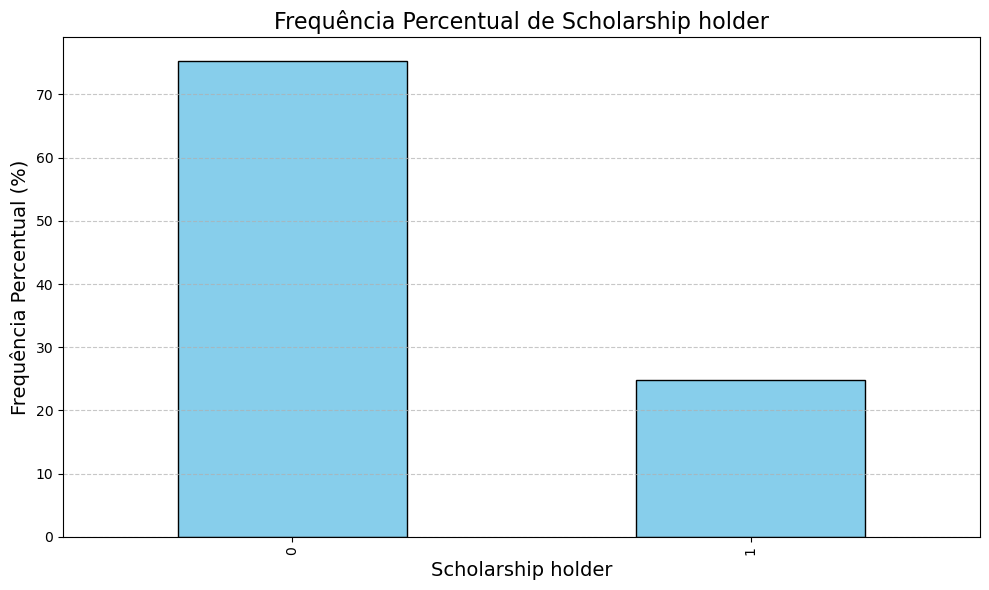

Distribuição Percentual das Classes para International
International
0    99.337411
1     0.662589
Name: count, dtype: float64


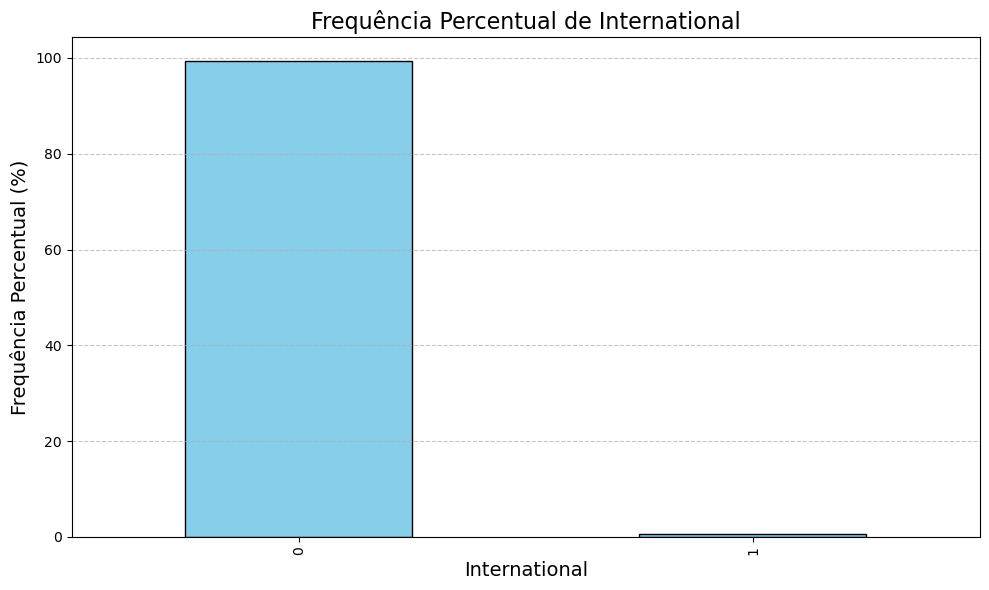

Distribuição Percentual das Classes para Target
Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: count, dtype: float64


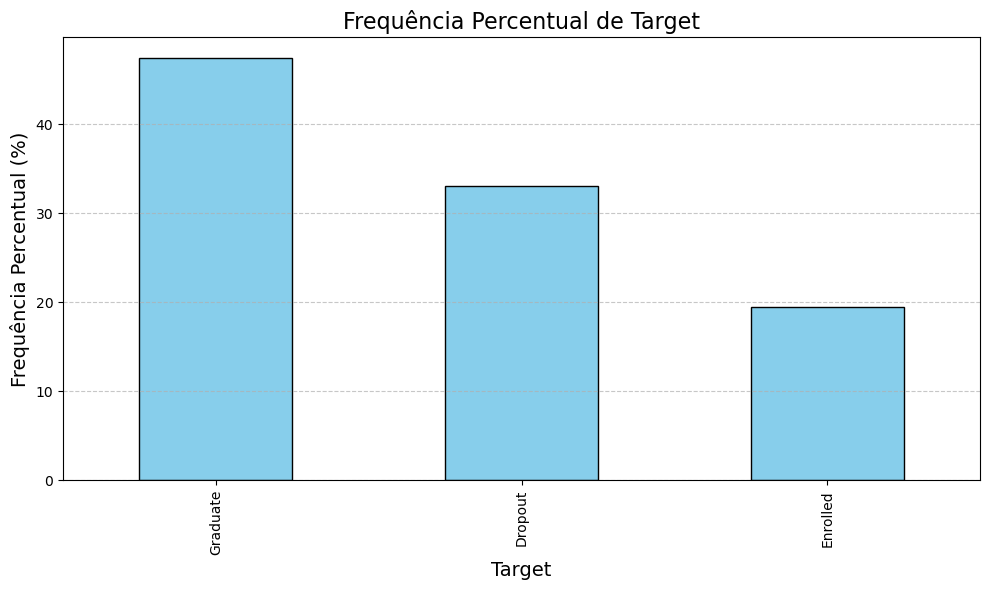

In [42]:
for var in df_exp.drop(cols_continuas, axis=1).drop('id', axis=1).columns:
    freq_classes(var)

### | Observando os Gráficos

Após a análise detalhada dos gráficos apresentados, identificamos diversas características nas variáveis categóricas que não foram explicitamente abordadas no relatório. Abaixo, destacamos as principais observações:

- **Marital status**: Esta variável apresenta um alto desbalanceamento, com mais de 90% dos registros sendo compostos por indivíduos solteiros.
- **Application mode**: Também desbalanceada, com as três classes mais frequentes representando, juntas, mais de 85% da base de dados.
- **Application order**: A variável é desbalanceada, com as duas classes mais frequentes totalizando mais de 82% dos registros.
- **Course**: Embora menos desbalanceada em comparação às variáveis anteriores, existe uma disparidade considerável, com as quatro classes mais frequentes compondo mais de 45% dos dados. Apesar disso, os valores ainda permitem uma análise viável.
- **Daytime/evening attendance**: Extremamente desbalanceada, com alunos que frequentam aulas diurnas representando 91% dos registros.
- **Previous qualification**: Apresenta um desbalanceamento significativo, com a classe mais frequente (alunos provenientes do ensino secundário) compondo mais de 87% da base.
- **Nationality**: Alinhado ao relatório, esta variável é extremamente desbalanceada, com alunos portugueses representando 99% dos dados.
- **Mother's qualification**: A variável é desbalanceada, com as quatro classes mais frequentes totalizando mais de 85% dos registros.
- **Father's qualification**: De forma similar, a variável é desbalanceada, com as quatro classes mais frequentes compondo mais de 90% dos dados.
- **Mother's occupation**: A variável apresenta um desbalanceamento, com as três classes mais frequentes totalizando mais de 74% dos registros.
- **Father's occupation**: De forma semelhante, as três classes mais frequentes compõem mais de 57% dos dados, indicando um certo desbalanceamento.
- **Displaced**: Esta variável não apresenta desbalanceamento significativo, exibindo uma distribuição equilibrada entre as duas classes binárias.
- **Educational special needs**: Conforme destacado no relatório, esta variável é extremamente desbalanceada, com a classe dominante representando 99% dos dados.
- **Debtor**: Como observado no relatório, a variável é extremamente desbalanceada, com alunos que não possuem dívidas compondo 92% da base.
- **Tuition fees up to date**: Esta variável é desbalanceada, com 89% dos registros representando alunos que mantêm os pagamentos em dia. Nota-se uma ligeira discrepância em relação à variável Debtor, sugerindo um grau de tolerância ao atraso no pagamento antes que o aluno seja classificado como inadimplente.
- **Gender**: Apesar de uma maioria feminina (68%), como existem apenas duas classes (masculino e feminino), a variável não é considerada desbalanceada.
- **Scholarship holder**: Apresenta desbalanceamento, com 75% da base sendo composta por alunos que não possuem bolsas escolares.
- **International**: Extremamente desbalanceada, corroborando com a variável Nationality, evidenciando que 99% dos alunos são nacionais (portugueses).
- **Target**: Esta variável não apresenta desbalanceamento relevante, com a classe mais frequente (alunos que se graduaram) compondo apenas 47% dos registros.

Dessa forma, constatamos que a maior parte das variáveis categóricas apresenta algum grau de desbalanceamento. Para uma avaliação mais pragmática e consistente sobre quais variáveis podem ser consideradas efetivamente desbalanceadas, adotaremos uma métrica quantitativa para medir esse comportamento, dado que o desbalanceamento é uma característica recorrente em grande parte das variáveis analisadas.



### | Avaliando Desbalanceamento

Para essa abordagem mais pragmática, vamos utilizar o **Índice de Gini** e o **Índice de Shannon** para quantificar o desbalanceamento das variáveis.

O índice de gini mede a desiguladade na distribuição das classes, onde valores próximos a 0 indicam uma distribuição balanceada, enquanto valores próximos a 1 apontam para um desbalanceamento severo. O índice é calculado por:

$$G = 1 - \sum^K_{i=1}p_i^2$$

Onde:
- $k$ é o número total de classes
- $p_i$ é a proporção da classe $i$ em relação ao total

Em seguida, vamos aplicar o índice de shannon que é relacionado a **entropia** nas classes, mas normalizando pela máximo entropia possível. Ele mede a uniformidade da distribuição, com valores altos indicam classes igualmente distribuídas, e valores baixos indicando a concentração em poucas classes. O índice é calculado por:

$$H'=-\sum^k_{i=1}p_i\cdot\ln(p_i)$$

Onde:
- $k$ é o número total de classes
- $p_i$ é a proporção de observações na $i$-ésima classe $p_i=\frac{n_i}{N}$, sendo $n_i$ o número de observações na $i$-ésima classe e $N$ o número total de observações

O código abaixo será usado para aplicar essas fórmulas diretamente nas variáveis e categoriza-las com base nos seus índices em:
- Variáveis totalmente desbalanceadas
- Variáveis altamente desbalanceadas
- Variáveis moderadamente desbalanceadas
- Variáveis balanceadas

Com base na análise anterior, esperamos observar resultados semelhantes a respeito das variáveis.

In [43]:
# Função para calcular o índice de gini de acordo com a fórnula
def calcular_gini(pi):
    return 1 - np.sum(pi**2)

# Função para calcular o índice de shannon de acordo com a fórnula
def calcular_shannon(pi):
    return -np.sum(pi * np.log(pi))

# Função para avaliar a variável categórica de acordo com seus índices
def avaliar_variavel_categorica(col):
    # Calcula proporção das classes
    pi = df_exp[col].value_counts() / df_exp.shape[0]
    
    # Calcula índice gini
    gini = calcular_gini(pi)
    
    # Calcula índice shannon
    shannon = calcular_shannon(pi)

    # Calcula entropia máxima dado o número de classes
    max_shannon = np.log(df_exp[col].nunique())

    print('='*50)
    print(f'A variável {col} possui:\nÍndice de Gini = {gini}\nÍndice de Shannon = {shannon}')

    # Classificação pelo Gini
    if gini >= 0.8:
        classe_gini = 'Totalmente desbalanceada'
    elif gini >= 0.6:
        classe_gini = 'Altamente desbalanceada'
    elif gini >= 0.4:
        classe_gini = 'Moderadamente desbalanceada'
    else:
        classe_gini = 'Balanceada'
    
    # Classificação pelo Shannon
    if shannon <= 0.2 * max_shannon:
        classe_shannon = 'Totalmente desbalanceada'
    elif shannon <= 0.4 * max_shannon:
        classe_shannon = 'Altamente desbalanceada'
    elif shannon <= 0.7 * max_shannon:
        classe_shannon = 'Moderadamente desbalanceada'
    else:
        classe_shannon = 'Balanceada'

    # Ajuste final da classificação considerando Gini e Shannon
    if classe_gini == 'Totalmente desbalanceada' or classe_shannon == 'Totalmente desbalanceada':
        class_final = 'Totalmente desbalanceada'
    elif classe_gini == 'Altamente desbalanceada' or classe_shannon == 'Altamente desbalanceada':
        class_final = 'Altamente desbalanceada'
    elif classe_gini == 'Moderadamente desbalanceada' or classe_shannon == 'Moderadamente desbalanceada':
        class_final = 'Moderadamente desbalanceada'
    else:
        class_final = 'Balanceada'

    # Imprimir a classificação final
    print(f'Classificamos ela como {class_final}')

In [44]:
for var in df_exp.drop(cols_continuas, axis=1).drop('id', axis=1).columns:
    avaliar_variavel_categorica(var)

A variável Marital status possui:
Índice de Gini = 0.15366275483556746
Índice de Shannon = 0.32987953862662733
Classificamos ela como Totalmente desbalanceada
A variável Application mode possui:
Índice de Gini = 0.7018886676402052
Índice de Shannon = 1.5229086574037574
Classificamos ela como Altamente desbalanceada
A variável Application order possui:
Índice de Gini = 0.4726314039866455
Índice de Shannon = 1.0220627112874825
Classificamos ela como Moderadamente desbalanceada
A variável Course possui:
Índice de Gini = 0.9154970198788874
Índice de Shannon = 2.608248415859686
Classificamos ela como Totalmente desbalanceada
A variável Daytime/evening attendance possui:
Índice de Gini = 0.15502849012071884
Índice de Shannon = 0.2900675140786316
Classificamos ela como Moderadamente desbalanceada
A variável Previous qualification possui:
Índice de Gini = 0.22564983267124217
Índice de Shannon = 0.5833434145233646
Classificamos ela como Totalmente desbalanceada
A variável Nacionality possui:
Ín

As variáveis identificadas como desbalanceadas com base na análise gráfica foram as seguintes: Marital status, Application mode, Application order, Daytime/evening attendance, Previous qualification, Nationality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder e International.

No entanto, é importante destacar algumas discrepâncias observadas. Por exemplo, as variáveis Course, Displaced, Gender e Target foram classificadas como **desbalanceadas** pelo código apresentado, diferentemente da análise gráfica. Além disso, ao contrário da interpretação anterior, a variável Scholarship holder foi considerada a única balanceada com base nos parâmetros aplicados pelas fórmulas.

Outra característica relevante do código é sua capacidade de quantificar o grau de desbalanceamento de cada variável. Essa métrica será armazenada para uso em análises futuras, já que pode fornecer insights valiosos e contribuir para decisões mais embasadas.

In [53]:
# Criando dicionário com a classificação criada
variaveis_categoricas_classificacao = {
    "Marital status": "Totalmente desbalanceada",
    "Application mode": "Altamente desbalanceada",
    "Application order": "Moderadamente desbalanceada",
    "Course": "Totalmente desbalanceada",
    "Daytime/evening attendance": "Moderadamente desbalanceada",
    "Previous qualification": "Totalmente desbalanceada",
    "Nacionality": "Totalmente desbalanceada",
    "Mother's qualification": "Altamente desbalanceada",
    "Father's qualification": "Altamente desbalanceada",
    "Mother's occupation": "Altamente desbalanceada",
    "Father's occupation": "Totalmente desbalanceada",
    "Displaced": "Moderadamente desbalanceada",
    "Educational special needs": "Totalmente desbalanceada",
    "Debtor": "Altamente desbalanceada",
    "Tuition fees up to date": "Moderadamente desbalanceada",
    "Gender": "Moderadamente desbalanceada",
    "Scholarship holder": "Balanceada",
    "International": "Totalmente desbalanceada",
    "Target": "Altamente desbalanceada"
}

# Armazendo classificação criada em arquivo feather
(pd.DataFrame(list(variaveis_categoricas_classificacao.items()), columns=['Variável', 'Classificação'])
 .to_feather(path='../data/processed/classificacao_variaveis_categoricas.feather'))

<a name="bivariada"></a>
# | Análise Bivariada

Para essa próxima etapa da nossa análise, vamos avaliar as **relações** das variáveis com base em diferentes medidas de associações. Nosso foco principal é determinar a associação das variáveis explicativas com a nossa variável resposta.

[Retornar ao Índice](#índice)

<a name="bcontinuas"></a>
## | Analisando Variáveis Contínuas

[Retornar ao Índice](#índice)

Como estamos trabalhando com variáveis contínuas e uma variável categórica, vamos usar o **Coeficiente de Correlação de Ponto Biserial** para determinar a relação dessas variáveis de alta correlação entre si com a nossa variável **Target** 

O coeficiente de correlação de ponto biserial é uma extensão do coeficiente de correlação de Pearson para medir a associação entre uma variável contínua e uma binária. Ele é apropriado quando a variável binária representa uma classificação verdadeira. A fórmula desse coeficiente é dado por:

$$\gamma_{pb}=\frac{\overline X_1 - \overline X_0}{s_X}\cdot\sqrt{\frac{p(1-p)}{n}}$$

Onde:
- $\overline X_1$ e $\overline X_0$ são as médias da variável contínua para os grupos 1 e 0 da variável binária
- $s_X$ é o desvio padrão da variável contínua
- $p$ é a proporção de casos no grupo 1
- $n$ é o tamanho da amostra

Para que nossa tabela de correlação seja construída, no entanto, precisamos mapear a variável resposta. Considerando que o nosso foco é estudar alunos que abandonam os cursos, vamos transformar a variável resposta em uma variável binária, cujo valor positivo 1 representa um aluno que abandonou o curso e o valor 0 representa o aluno que não abandonou o curso.

In [54]:
df_exp['Target'] = df_exp['Target'].map({'Graduate': 0, 'Enrolled': 0, 'Dropout': 1})
df_exp['Target'].head(5)

0    0
1    1
2    1
3    0
4    0
Name: Target, dtype: int64

In [55]:
# Criando tabela de correlação
cor = pd.DataFrame([(col, *pointbiserialr(df_exp['Target'], df_exp[col])) for col in df_exp[cols_continuas]], columns=['Variável', 'Correlação com Target', 'P-value'])
cor

,Variável,Correlação com Target,P-value
0,Previous qualification (grade),-0.090179,6.807150e-138
1,Admission grade,-0.133493,3.745972e-301
2,Age at enrollment,0.330870,0.000000e+00
3,Curricular units 1st sem (credited),-0.026679,1.569943e-13
4,Curricular units 1st sem (enrolled),-0.228257,0.000000e+00
5,Curricular units 1st sem (evaluations),-0.243344,0.000000e+00
6,Curricular units 1st sem (approved),-0.689017,0.000000e+00
7,Curricular units 1st sem (grade),-0.681377,0.000000e+00
8,Curricular units 1st sem (without evaluations),0.047391,2.648959e-39
9,Curricular units 2nd sem (credited),-0.027872,1.245599e-14


Avaliando a relação acima, vamos extrair apenas as variáveis com as correlações mais relevantes com nossa variável resposta, seriam essas:
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)

Vamos observar essas quatro variáveis em particular e sua relação entre si. Começando pelo par de variáveis que representam a nota dos alunos no 1º e 2º semestre.

In [56]:
notas = (df_exp[['Target', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
          .assign(media_por_estudante=(df_exp['Curricular units 1st sem (grade)'] + df_exp['Curricular units 2nd sem (grade)'])/2))

notas['media_por_categoria'] = df_exp['Target'].map(notas.groupby('Target')['media_por_estudante'].mean())

notas['residuo'] = notas['media_por_estudante'] - notas['media_por_categoria']

notas.head(5)

,Target,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),media_por_estudante,media_por_categoria,residuo
0,0,14.500000,12.428571,13.464286,12.520088,0.944198
1,1,11.600000,0.000000,5.800000,4.325274,1.474726
2,1,0.000000,0.000000,0.000000,4.325274,-4.325274
3,0,12.591250,12.820000,12.705625,12.520088,0.185537
4,0,12.933333,12.933333,12.933333,12.520088,0.413245


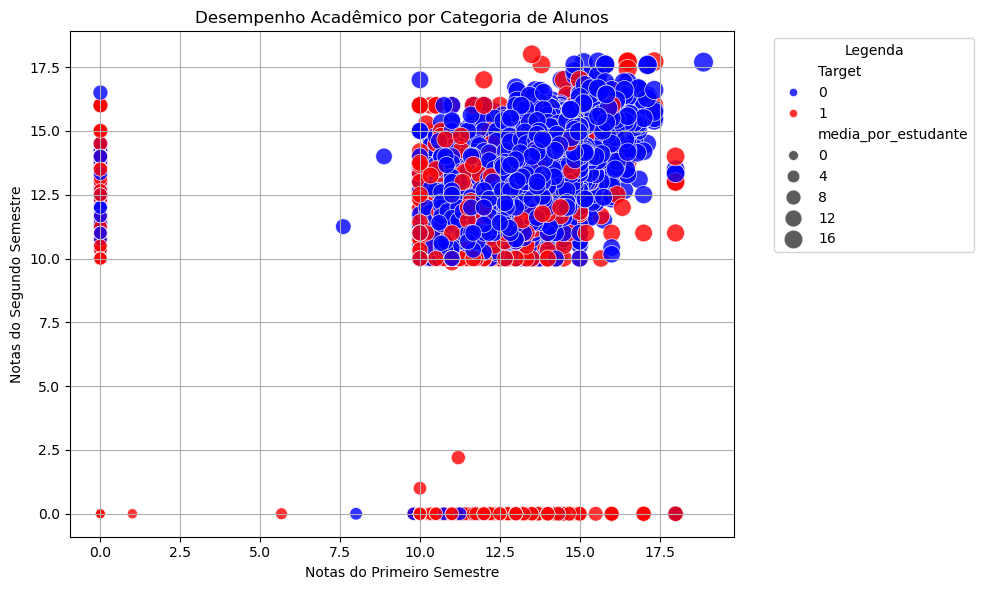

In [58]:
# Cria a figura
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão
sns.scatterplot(
    data=notas,
    x='Curricular units 1st sem (grade)',
    y='Curricular units 2nd sem (grade)',
    hue='Target',
    size='media_por_estudante',
    sizes=(50, 200),
    palette={1: 'red', 0: 'blue'},
    alpha=0.8,
    legend='brief'
)

# Configura a figura
plt.title('Desempenho Acadêmico por Categoria de Alunos')
plt.xlabel('Notas do Primeiro Semestre')
plt.ylabel('Notas do Segundo Semestre')
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Visualiza a figura 
plt.show()

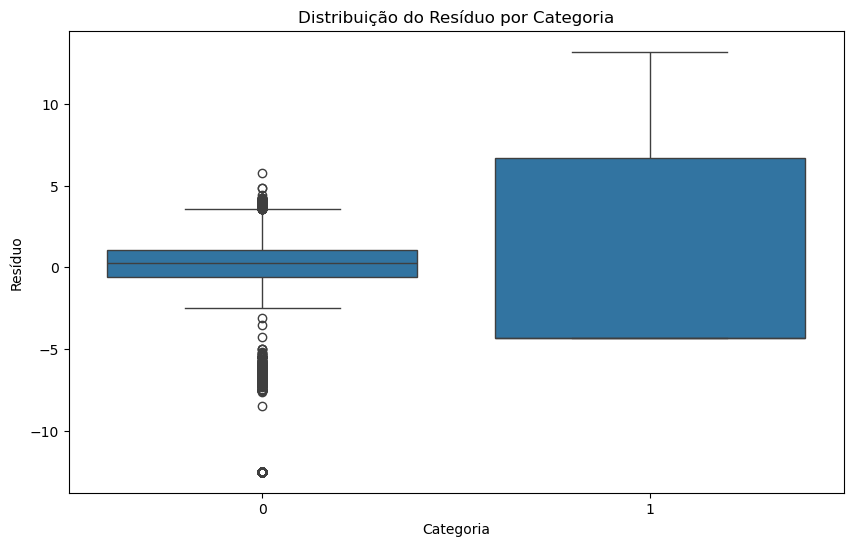

In [59]:
# Plotando o resíduo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='residuo', data=notas)

# Definindo título e rótulos
plt.title('Distribuição do Resíduo por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Resíduo')

# Exibindo o gráfico
plt.show()

Como evidenciado nos gráficos apresentados, os alunos com bom desempenho em ambos os semestres tendem a ter as maiores médias de notas e, consequentemente, não abandonam o curso. No entanto, há casos de alunos que, apesar de apresentarem boas notas em ambos os semestres, optam por abandonar o curso. Além disso, observa-se a existência de alunos que, após um desempenho insatisfatório em um semestre, conseguem recuperar suas notas no semestre seguinte, com a maioria desses casos resultando no abandono do curso.

A análise do boxplot revela que os alunos que abandonaram o curso apresentam uma **variância elevada** em suas médias, enquanto aqueles que permanecem no curso demonstram uma variabilidade mais baixa nas notas, embora com uma quantidade significativa de outliers. Diante desses dados, torna-se evidente a necessidade de considerar um novo conjunto de variáveis que possam fornecer um entendimento mais profundo sobre os fatores que influenciam o abandono no ensino superior. Nesse contexto, a próxima etapa será a análise de outras variáveis que apresentam alta correlação com a variável de resposta, a fim de identificar fatores adicionais que possam explicar esse fenômeno.

In [60]:
aprovados = (df_exp[['Target', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']]
          .assign(media_por_estudante=(df_exp['Curricular units 1st sem (approved)'] + df_exp['Curricular units 2nd sem (approved)'])/2))

aprovados['media_por_categoria'] = df_exp['Target'].map(aprovados.groupby('Target')['media_por_estudante'].mean())

aprovados.head(5)

,Target,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),media_por_estudante,media_por_categoria
0,0,6,6,6.0,5.455869
1,1,4,0,2.0,1.332898
2,1,0,0,0.0,1.332898
3,0,7,7,7.0,5.455869
4,0,6,6,6.0,5.455869


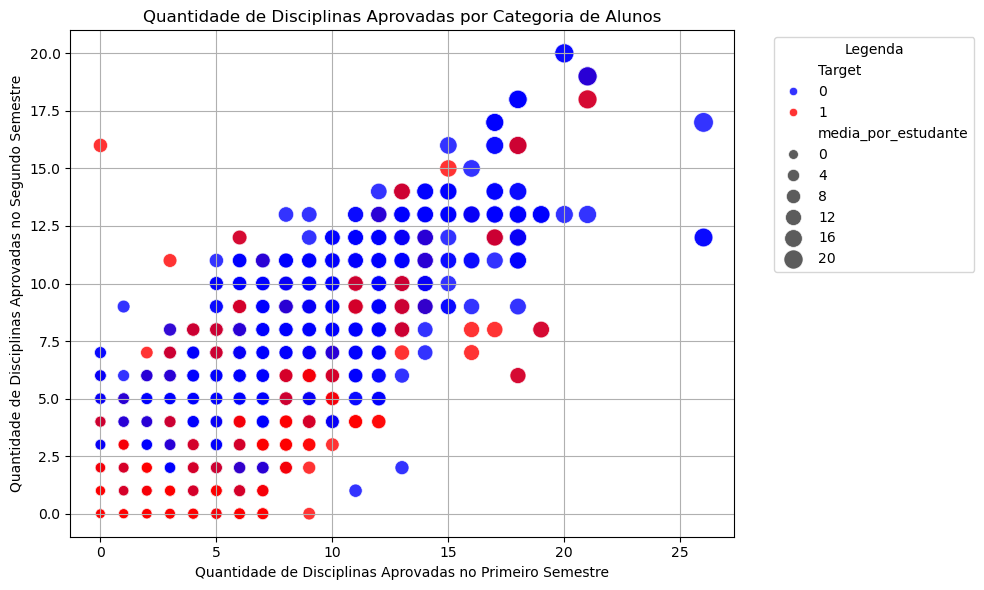

In [61]:
# Cria a figura
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão
sns.scatterplot(
    data=aprovados,
    x='Curricular units 1st sem (approved)',
    y='Curricular units 2nd sem (approved)',
    hue='Target',
    size='media_por_estudante',
    sizes=(50, 200),
    palette={1: 'red', 0: 'blue'},
    alpha=0.8,
    legend='brief'
)

# Configura a figura
plt.title('Quantidade de Disciplinas Aprovadas por Categoria de Alunos')
plt.xlabel('Quantidade de Disciplinas Aprovadas no Primeiro Semestre')
plt.ylabel('Quantidade de Disciplinas Aprovadas no Segundo Semestre')
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Visualiza a figura 
plt.show()

A partir da análise dos dados apresentados, observa-se que a quantidade de disciplinas aprovadas é significativamente maior entre os alunos que permaneceram no curso em comparação com aqueles que o abandonaram. Além disso, o gráfico revela uma maior dispersão dos dados, com os pontos representando alunos que não abandonaram o curso (indicados em azul) localizados predominantemente em faixas superiores, enquanto os pontos correspondentes aos alunos que abandonaram o curso (indicados em vermelho) se concentram em faixas inferiores. Esse padrão sugere uma relação entre o número de disciplinas aprovadas e a permanência no curso, apontando que o sucesso acadêmico pode ser um fator relevante para a continuidade dos estudos.

<a name="bcategoricas"></a>
## | Analisando Variáveis Categóricas

Seguindo com nossa análise, vamos observar a relação da variável resposta com as variáveis categóricas da nossa base de dados.

[Retornar ao Índice](#índice)

Para avaliar a correlação das variáveis categóricas com **Target**, vamos usar o **Coeficiente de Contingência (Cramér's V)**. Uma medida de associação usada para quantificar a força da relação entre duas variáveis categóricas, sendo particularmente útil para lidar com variáveis categóricas de mais de duas categorias (variávies de com multiplas classes). O Cramér's V varia de 0 a 1, onde 0 indica nenhuma associação entre as variáveis e 1 indica uma associação perfeita.

Cramér's V pode ser calculado por:

$$V=\sqrt{\frac{\chi^2}{n\cdot min(k-1, r-1)}}$$

Onde:
- $\chi^2$ é o valor do **teste Qui-quadrado** (um teste que avalia a independência entre as variáveis)
- $n$ é o tamano da amostra
- $k$ é o número de colunas da tabela de contingência (o número de classes da primeira variável)
- $r$ é o número de linhas da tabela de contingência (o número de classes da segunda variável)
- $min(k-1,r-1)$ é o menor valor entre $k-1$ e $r-1$, usado para ajustar a fórmula levando em consideração o número de classes em cada variável

O código abaixo calcula o coeficiente para cada variável categórica.

In [63]:
def cramers_v(confusion_matrix):
    # Calcular o valor do qui-quadrado
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    
    # Número de observações
    n = confusion_matrix.sum().sum()

    # Número de linhas e colunas
    r, c = confusion_matrix.shape
    
    # Calculando o valor de Cramér's V
    v = np.sqrt(chi2 / (n * min(r - 1, c - 1)))
    
    return v

In [64]:
# Aplicando função nas variáveis
pd.DataFrame(
    {col: [cramers_v(pd.crosstab(df_exp['Target'], df_exp[col]))] for col in df_exp.drop('id', axis=1).drop(cols_continuas, axis=1).columns})

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,0.149268,0.399019,0.12623,0.33788,0.129746,0.266245,0.026366,0.241552,0.236883,0.234088,0.218119,0.142199,0.000022,0.256035,0.446433,0.298252,0.316025,0.001333,0.99997


Com base na relação, as variáveis categóricas mais interessantes para nossa análise são:
- Tuition fees up to date
- Scholarship holder
- Course
- Application mode

Para analisar essas variáveis, vamos definir algumas funções na célula abaixo.

In [65]:
# Função para analisar uma variável categórica binária
def analisar_variavel_categorica_binaria(col):
    plotar_catplot(col)

    # Cria tabela cruzada
    cross = pd.crosstab(index=df_exp['Target'], columns=df_exp[col])

    # Visualiza proporções gerais 
    print('Proporção por nº de observações totais')
    print((cross / df_exp.shape[0]) * 100)
    print()

    # Visuaiza proporção por classe
    print(f'Proporção por nº de observações de classe de {col}')
    print('Classe 0:')
    print((cross[0] / cross[0].sum()) * 100)
    print()
    print('Classe 1:')
    print((cross[1] / cross[1].sum()) * 100)

def plotar_catplot(col):
    # Cria plot 
    g = sns.catplot(
        data=df_exp,
        x='Target',
        col=col,
        kind='count',
        height=4, 
        aspect=1.2,
        col_wrap=2
    )

    # Visualiza figura
    g.fig.suptitle(f'Distribuição por Categoria de Aluno da Variável {col}', y=1.05)
    plt.tight_layout()
    plt.show()

def analisar_variavel_categorica_multiclasse(col):
    plotar_catplot(col)

    # Cria tabela cruzada
    cross = pd.crosstab(index=df_exp['Target'], columns=df_exp[col])

    # Visualiza proporções gerais 
    print('Proporção por nº de observações totais')
    print((cross / df_exp.shape[0]) * 100)
    print()

    # Visualiza proporções por classe
    print(f'Proporção por nº de observações de classe de {col}')
    for classe in df_exp[col].unique():
        print(f'Classe {classe}:')
        print((cross[classe] / cross[classe].sum()) * 100)
        print()
        

Com as funções definidas, vamos começar analisando a distribuição dos alunos pela relação entre **Target** e **Tuition fees up to date**.

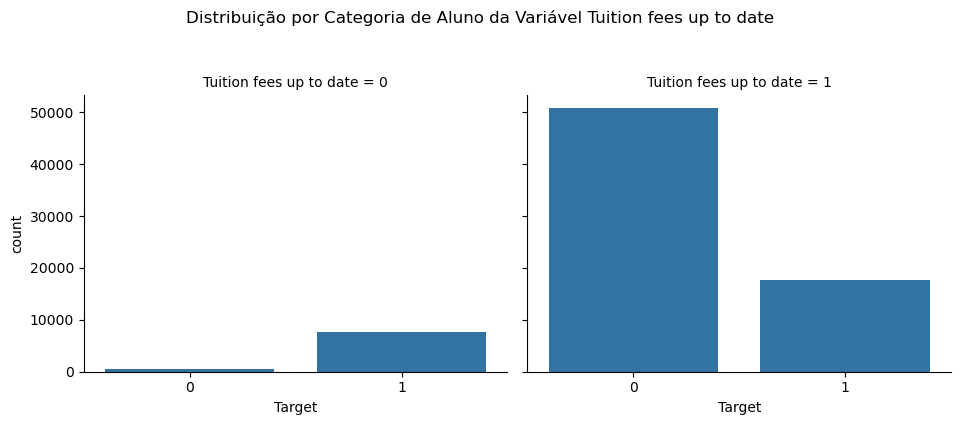

Proporção por nº de observações totais
Tuition fees up to date         0          1
Target                                      
0                        0.644293  66.296819
1                        9.991113  23.067775

Proporção por nº de observações de classe de Tuition fees up to date
Classe 0:
Target
0     6.058
1    93.942
Name: 0, dtype: float64

Classe 1:
Target
0    74.186897
1    25.813103
Name: 1, dtype: float64


In [66]:
analisar_variavel_categorica_binaria('Tuition fees up to date')

Observando o gráfico acima, podemos ver que a maioria dos alunos mantiveram o pagamento das taxas da instituição em dia, especialmente alunos que não abandonaram o curso. A relação nos mostra que dos alunos que mantiveram o seu pagamento em dia, os alunos que não abandonaram o curso representam 74% dos dados, já dos alunos que não mantiveram o seu pagamento em dia, os alunos que abandonaram o curso representam 93% dos dados. Essa disparidade confirma a associação que as duas variáveis **Tuition fees up to date** e **Target** compartilham entre si.

Vamos observar a relação de **Scholarship holder** com **Target**

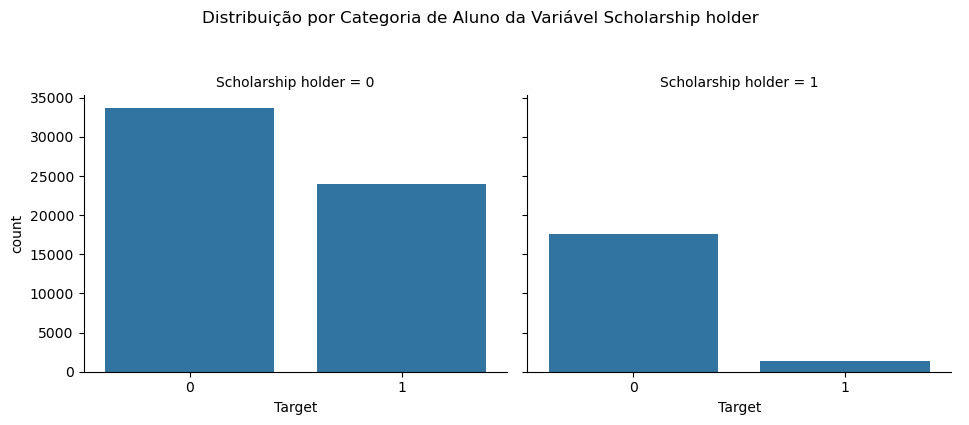

Proporção por nº de observações totais
Scholarship holder          0          1
Target                                  
0                   43.964819  22.976293
1                   31.295904   1.762984

Proporção por nº de observações de classe de Scholarship holder
Classe 0:
Target
0    58.416684
1    41.583316
Name: 0, dtype: float64

Classe 1:
Target
0    92.873745
1     7.126255
Name: 1, dtype: float64


In [67]:
analisar_variavel_categorica_binaria('Scholarship holder')

Observando o gráfico vemos que a maioria dos alunos que não abandonaram o curso também não possuem uma bolsa de estudos, o mesmo se estende para os alunos que abandonaram o curso. Como podemos ver pela relação, dos alunos que não possuem uma bolsa de estudos, existe uma distribuição entre alunos que abandonaram o curso e aqueles que não, com esses compondo a maioria com 58% dos dados. Já dos alunos que possuem uma bolsa de estudos, a maioria deles são alunos que não abandonaram o curso, compondo 92% dos dados. Isso pode implicar que alunos que receberam bolsa de estudos são menos provavéis de abandonar o curso, mas vamos prosseguir com nossa análise antes de chegarmos a conclusões decisivas.

Iremos observar agora o comportamento da variável **Course** em relação a **Target**. Para isso, vamos mapear a variável Course para facilitar a leitura das classes.

In [68]:
# Cursos
cursos = {
    33: "Tecnologias de Produção de Biocombustíveis",
    171: "Animação e Design Multimédia",
    8014: "Serviço Social (atendimento noturno)",
    9003: "Agronomia",
    9070: "Design de Comunicação",
    9085: "Enfermagem Veterinária",
    9119: "Engenharia Informática",
    9130: "Equinicultura",
    9147: "Gestão",
    9238: "Serviço Social",
    9254: "Turismo",
    9500: "Enfermagem",
    9556: "Higiene Oral",
    9670: "Gestão de Publicidade e Marketing",
    9773: "Jornalismo e Comunicação",
    9853: "Ensino Básico",
    9991: "Gestão (atendimento noturno)"
}

# Mapeando variável course para facilitar leitura
df_exp['Course'] = df_exp['Course'].map(cursos)

# Prenchendo valores não identificados
df_exp['Course'] = df_exp['Course'].replace({np.nan: 'Não identificado'})

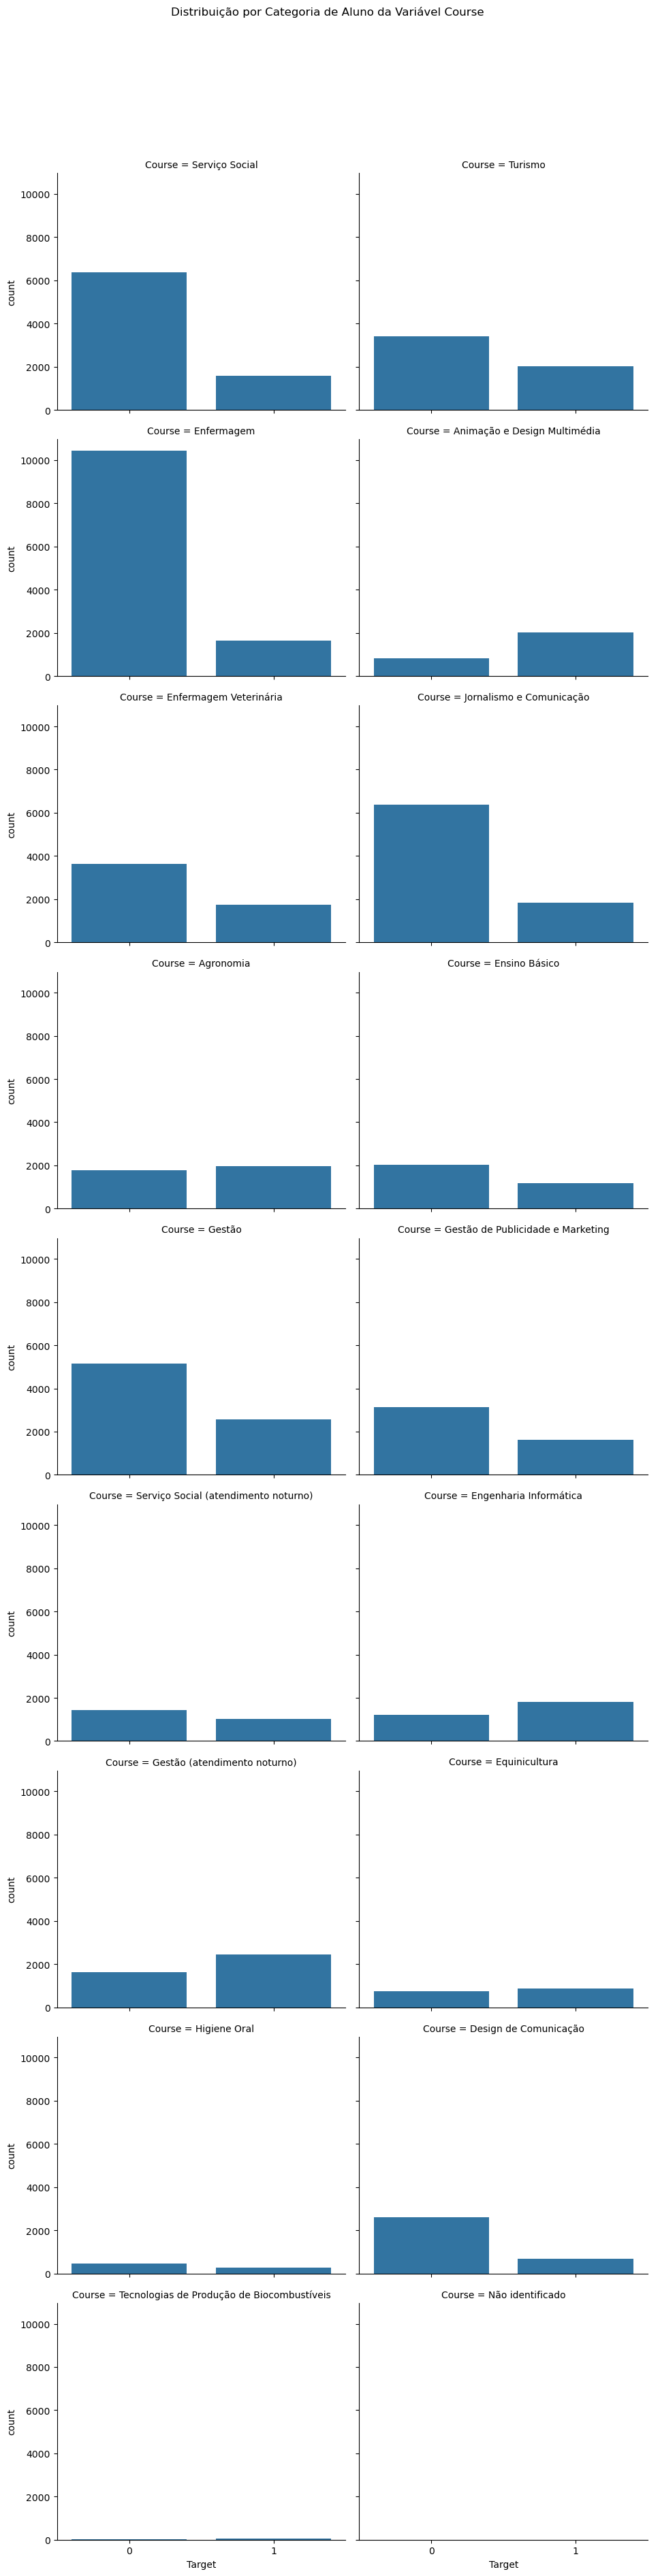

Proporção por nº de observações totais
Course  Agronomia  Animação e Design Multimédia  Design de Comunicação  \
Target                                                                   
0        2.314488                      1.074257               3.384824   
1        2.564103                      2.662119               0.903055   

Course  Enfermagem  Enfermagem Veterinária  Engenharia Informática  \
Target                                                               
0        13.645155                4.746596                1.577407   
1         2.134138                2.275282                2.348467   

Course  Ensino Básico  Equinicultura    Gestão  Gestão (atendimento noturno)  \
Target                                                                         
0            2.651664       0.952717  6.742204                      2.123683   
1            1.527745       1.146136  3.374369                      3.178337   

Course  Gestão de Publicidade e Marketing  Higiene Oral  \
Tar

In [70]:
analisar_variavel_categorica_multiclasse('Course')

Pelos gráficos e relações acima, observamos que o curso com o maior número de alunos que abandonaram em número relativo ao total de alunos ingressados no curso é **Tecnologias de Produção de Biocombustíveis** com 75% dos alunos tendo abandonado o curso, já o curso com a menor quantidade de alunos que abandonaram o curso em número relativo ao total de alunos ingressados no curso é **Enfermagem** com 13% dos alunos tendo abandonado o curso. Em números totais, o curso com a maior quantidade de alunos que abandonaram é **Gestão** com 3.37% dos dados sendo de alunos desse curso que o abandonaram, já o curso com a maior quantidade de alunos que não abandonaram em termos gerais é **Enfermagem** com 13.63% dos dados sendo de alunos desse curso que não o abandonaram.

Vamos finalizar essa etapa observando a relação da variável **Application mode** e **Target**. De forma semelhante, vamos mapear a variável Application mode para facilitar a leitura.

In [71]:
# Formas de aplicação
aplicacoes = {
    1: "1ª fase – contingente geral",
    2: "Portaria nº 612/93",
    5: "1ª fase - contingente especial (Ilha dos Açores)",
    7: "Titulares de outros cursos superiores",
    10: "Portaria nº 854-B/99",
    15: "Estudante internacional (bacharelado)",
    16: "1ª fase – contingente especial (Ilha da Madeira)",
    17: "2ª fase – contingente geral",
    18: "3ª fase – contingente geral",
    26: "Portaria n.º 533-A/99, alínea b2) (Plano Diferente)",
    27: "Portaria nº 533-A/99, item b3 (Outra Instituição)",
    39: "Maiores de 23 anos",
    42: "Transferência",
    43: "Mudança de curso",
    44: "Titulares de diploma de especialização tecnológica",
    51: "Mudança de instituição/curso",
    53: "Titulares de diplomas de ciclo curto",
    57: "Mudança de instituição/curso (Internacional)"
}

# Mapeando variável course para facilitar leitura
df_exp['Application mode'] = df_exp['Application mode'].map(aplicacoes)

# Prenchendo valores não identificados
df_exp['Application mode'] = df_exp['Application mode'].replace({np.nan: 'Não identificado'})

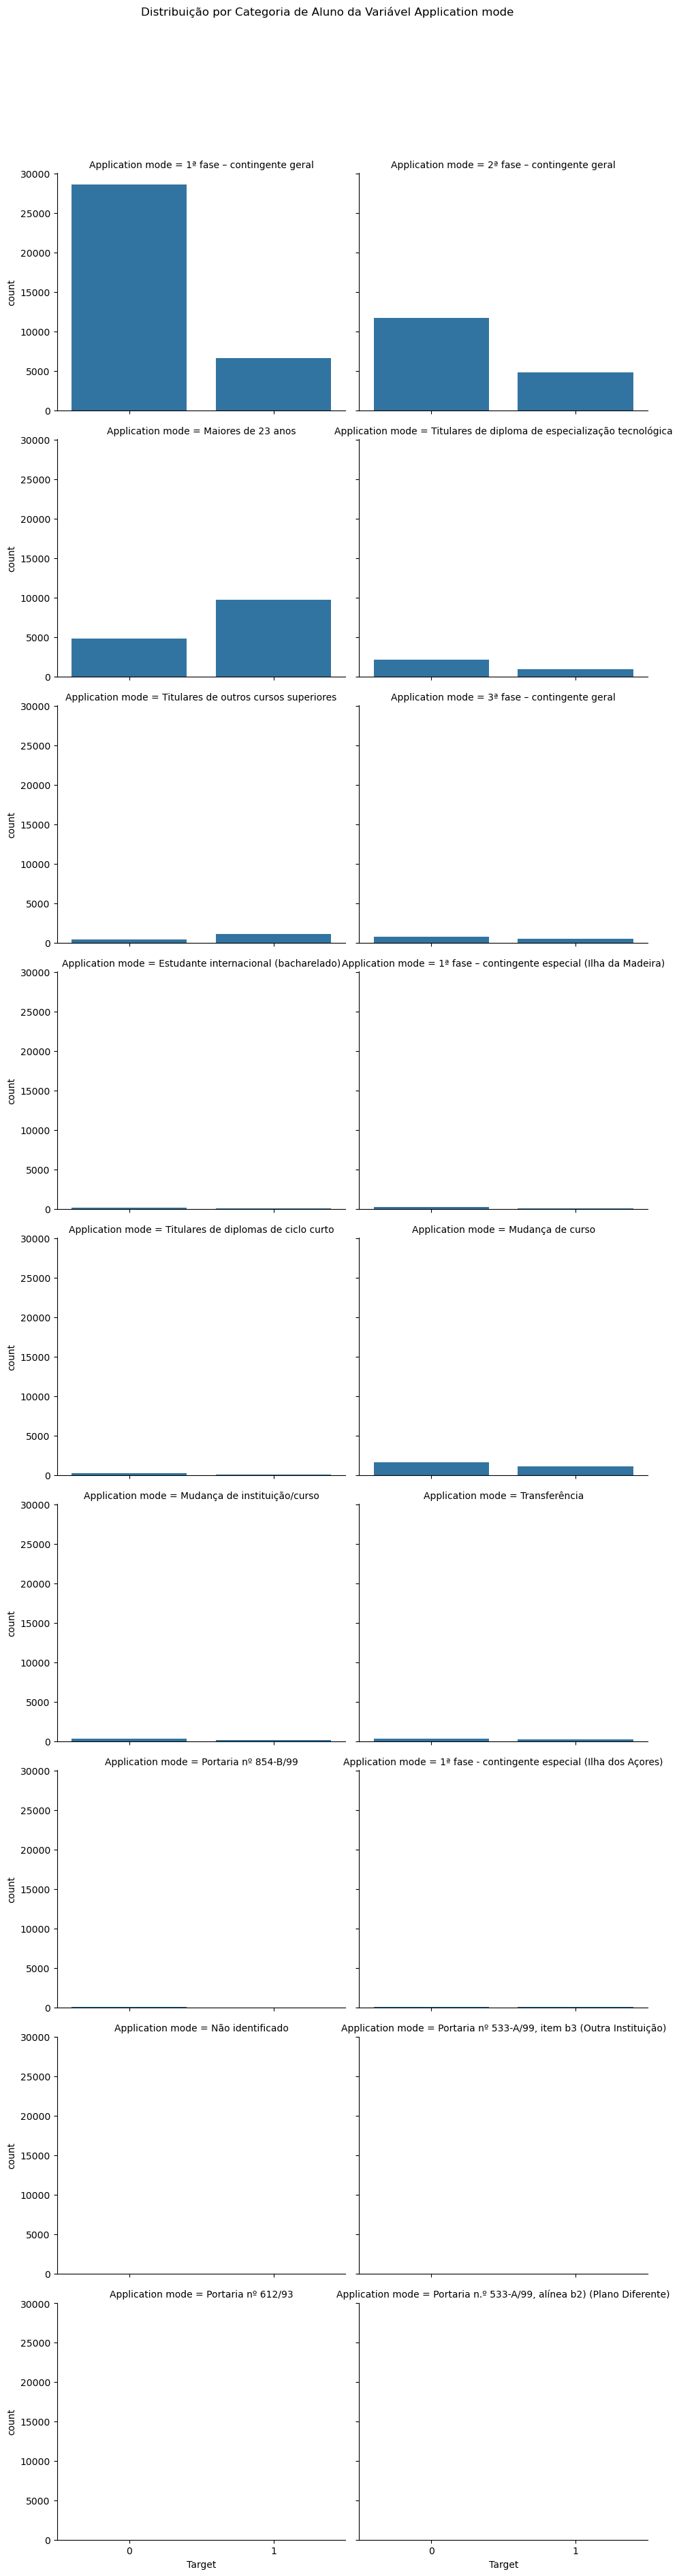

Proporção por nº de observações totais
Application mode  1ª fase - contingente especial (Ilha dos Açores)  \
Target                                                               
0                                                         0.090175   
1                                                         0.023524   

Application mode  1ª fase – contingente especial (Ilha da Madeira)  \
Target                                                               
0                                                         0.292742   
1                                                         0.053582   

Application mode  1ª fase – contingente geral  2ª fase – contingente geral  \
Target                                                                       
0                                   37.392509                    15.280065   
1                                    8.645025                     6.313547   

Application mode  3ª fase – contingente geral  \
Target                               

In [72]:
analisar_variavel_categorica_multiclasse('Application mode')

Observando os gráficos e a relações, notamos que o maior classe com a maior composição de alunos que abandonaram o curso é **"Titulares de outros cursos superiores"** com 72.16%, a classe com a menor composição é **"Portaria n.º 533-A/99, alínea b2) (Plano Diferente)"** com 0% dos dados. Observando referente a quantidade total das observações, a classe **"Maiores de 23 anos"** possui a maior composição de alunos que abandonaram o curso, com 12.7% dos dados, já a classe **"1ª fase – contingente geral"** possui a maior composição de alunos que não abandonaram o curso, com 37.39% dos dados.

<a name="insights"></a>
# | Insights

[Retornar ao Índice](#índice)

## | Desempenho Acadêmico
Matrículas e Aprovação de Disciplinas:
Observamos que a maioria dos alunos se matricula entre 2 a 8 disciplinas no 1º semestre, e entre 5 a 9 disciplinas no 2º semestre, com um leve aumento na média do número de disciplinas no 2º semestre.
Apesar disso, a taxa de aprovação média reduziu em 3.56% no 2º semestre, acompanhada por uma queda considerável na quantidade de disciplinas aprovadas. Em especial, a classe de alunos que não aprovaram nenhuma disciplina (classe 0) cresceu 3.20% no 2º semestre.

Distribuição de Notas:
As notas no 2º semestre apresentaram menos variação e maior concentração em valores altos, mas com um número considerável de alunos concentrando suas notas entre 0 e 2.5. Os alunos que abandonaram o curso tendem a apresentar maior variância nas médias semestrais, enquanto aqueles que continuaram têm variação menor, mas com presença de outliers.

Impacto do Desempenho no Abandono:
Há uma relação clara entre o número de disciplinas aprovadas e a continuidade no curso. Alunos que permanecem tendem a aprovar mais disciplinas, enquanto aqueles com menor desempenho estão mais propensos ao abandono.

## | Perfil Demográfico e Notas
Idade:
A maioria dos alunos está na faixa etária de 18 a 20 anos, representando 66.3% dos dados. Esta variável, entretanto, apresenta alta concentração e contribui menos para a explicação de variações no modelo.

Notas de Admissão e Qualificação Anterior:
Ambas as variáveis possuem alta quantidade de outliers, sendo menos adequadas para modelagem. A distribuição das notas de qualificação é um pouco mais ampla, enquanto a de admissão é mais concentrada no intervalo de 110 a 130.

## | Fatores Econômicos
Taxas de Desemprego, Inflação e PIB:
Essas variáveis apresentaram boa variação e ausência de outliers, sendo potenciais candidatas para inclusão em modelos preditivos.

Pagamento de Taxas:
A análise evidencia uma relação forte entre a pontualidade no pagamento de taxas e a permanência no curso. Dos alunos que mantêm as taxas em dia, 74% permanecem no curso. Em contrapartida, entre aqueles com taxas atrasadas, 93% abandonaram o curso.

Bolsas de Estudo:
Alunos que recebem bolsas são menos propensos a abandonar o curso. Dos alunos com bolsas, 92% permanecem, indicando que o suporte financeiro pode ser um fator relevante na retenção acadêmica.

## | Variáveis Categóricas e Abandono
A maioria das variáveis categóricas analisadas apresenta desbalanceamento significativo. Por exemplo:

Estado civil: Mais de 90% dos alunos são solteiros.

Nacionalidade: 99% são portugueses.

Turno de aulas: 91% dos alunos frequentam aulas diurnas.

Qualificação dos pais: Classes mais frequentes somam 85% (mãe) e 90% (pai).

Relação entre Curso e Abandono:
O curso com maior taxa relativa de abandono é "Tecnologias de Produção de Biocombustíveis" (75%), enquanto "Enfermagem" apresenta a menor taxa relativa (13%). Em números absolutos, o curso com mais abandonos é "Gestão" (3.37% dos dados).

Modos de Ingresso:
A classe "Titulares de outros cursos superiores" apresenta a maior taxa de abandono relativa (72.16%), enquanto a "1ª fase – contingente geral" concentra a maior proporção de alunos que permanecem (37.39%).

## | Padrões de Abandono e Sucesso Acadêmico
Comportamento Observado:
Alunos com bom desempenho em ambos os semestres tendem a permanecer no curso. Contudo, há exceções de alunos com notas boas que abandonam, e de outros que recuperam o desempenho após um semestre ruim, mas mesmo assim desistem.

Fatores Associados ao Abandono:
Fatores como atraso no pagamento de taxas, ausência de bolsas, e desempenho acadêmico insatisfatório mostram forte associação com o abandono do curso.

## | Conclusão Final
A análise destaca uma combinação de fatores acadêmicos, demográficos e econômicos que influenciam o abandono no ensino superior. Os principais determinantes observados incluem desempenho acadêmico, pontualidade no pagamento de taxas, suporte financeiro (bolsas), e o curso escolhido.

Esses insights apontam para a necessidade de políticas institucionais focadas em:

Apoio acadêmico para alunos com baixo desempenho.
Incentivos financeiros, como bolsas e programas de assistência.
Monitoramento e suporte específico para cursos com altas taxas de abandono.
Explorar a correlação de outras variáveis e desenvolver modelos preditivos poderá fornecer um entendimento ainda mais profundo sobre os fatores determinantes do abandono e da permanência no curso.

<a name="prox"></a>
# | Próximos Passos

[Retornar ao Índice](#índice)

No próximo jupyter notebook vamos pré-selecionar as variáveis explicativas com base nos insights deste notebook, então vamos testar a importância e conduzir testes para verificar o impacto, multicolinearidade e significância estatística para o modelo.